In [2]:
# (1) ÏÑ§Ïπò Ï†Ñ, Í∏∞Ï°¥ ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï†úÍ±∞:
!pip uninstall -y numpy scipy gensim

# (2) ÏÑ§Ïπò: numpyÎäî gensimÏù¥ 2.0 ÎØ∏ÎßåÏùÑ ÏöîÍµ¨ÌïòÎØÄÎ°ú 1.x Î≤ÑÏ†ÑÏúºÎ°ú ÍπîÏïÑÏ£ºÎäî Í≤å Ï¢ãÏäµÎãàÎã§.
!pip install "numpy<2.0,>=1.18.5"  # Ïòà: numpy 1.26.x
!pip install "gensim==4.3.3"
!pip install konlpy pyLDAvis openpyxl networkx seaborn

# ÌïúÍ∏Ä Ìè∞Ìä∏
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


You can safely remove it manually.
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl (24.0 MB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl (46.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
atlite 0.4.0 requires xarray>=2024.03.0, but you have xarray 2023.11.0 which is incompatible.
rioxarray 0.18.1 requires xarray>=2024.7.0, but you have xarray 2023.11.0 which is incompatible.


  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl (24.0 MB)


SudoÍ∞Ä Ïù¥ Ïª¥Ìì®ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏäµÎãàÎã§. ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïòÎ†§Î©¥ ÏúºÎ°ú Ïù¥ÎèôÌïòÏÑ∏Ïöî. ]8;;ms-settings:developers\Developer Settings page]8;;\ ÏÑ§Ï†ï Ïï±Ïùò
SudoÍ∞Ä Ïù¥ Ïª¥Ìì®ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏäµÎãàÎã§. ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïòÎ†§Î©¥ ÏúºÎ°ú Ïù¥ÎèôÌïòÏÑ∏Ïöî. ]8;;ms-settings:developers\Developer Settings page]8;;\ ÏÑ§Ï†ï Ïï±Ïùò


In [3]:
import sys
print("Python exe:", sys.executable)

import gensim
print("gensim version:", gensim.__version__)


Python exe: c:\ProgramData\anaconda3\envs\pypsa-earth\python.exe
gensim version: 4.3.3


In [4]:
%pwd

'c:\\Users\\Administrator\\Desktop\\Again_DTM_Parliamentary_with pareto front - 5-40'

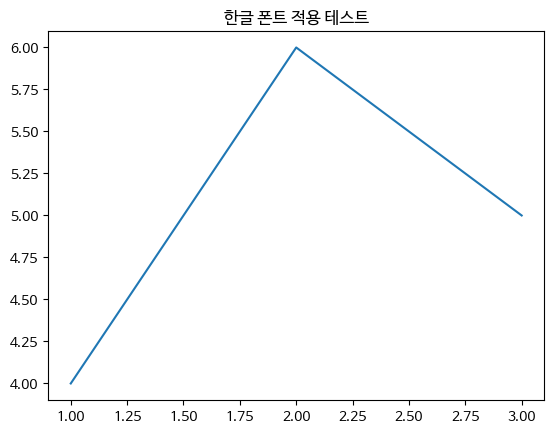

In [5]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from collections import defaultdict
from scipy.spatial.distance import cosine
from scipy.stats import entropy

# Konlpy Î∞è Okt
from konlpy.tag import Okt
okt = Okt()

# Gensim Í¥ÄÎ†®
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, Word2Vec
from gensim.matutils import cossim
from gensim.models.ldaseqmodel import LdaSeqModel

# Ìè∞Ìä∏ ÏÑ§Ï†ï (Colab)
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import matplotlib.colors as colors

font_path = (r"C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front\NanumBarunGothic.ttf")  # ColabÏóê ÏÑ§ÏπòÎêú ÎÇòÎàî Ìè∞Ìä∏ Í≤ΩÎ°ú
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

# ÌÖåÏä§Ìä∏
plt.title("ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö© ÌÖåÏä§Ìä∏")
plt.plot([1,2,3],[4,6,5])
plt.show()


In [6]:
##############################################################################
# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨
##############################################################################
FILE_PATH = (r"C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front - 5-40\api_combined_parliament.xlsx")  # Ïã§Ï†ú ÌååÏùº Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî.
df = pd.read_excel(FILE_PATH)

# Î∞îÎÄê Î∂ÄÎ∂Ñ: 'statement'Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
if ("year" not in df.columns) or ("statement" not in df.columns):
    raise ValueError("ÏóëÏÖÄÏóê 'year' ÎòêÎäî 'statement' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§. ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

# Í≤∞Ï∏° Ï†úÍ±∞, Ïó∞ÎèÑ Ïª¨Îüº Ï†ïÎ¶¨
df.dropna(subset=["statement"], inplace=True)
df["year"] = df["year"].astype(int)
df.sort_values(by="year", inplace=True)
df.reset_index(drop=True, inplace=True)

# Ïù¥ Îïå, Ïó¨Îü¨Î∂ÑÏù¥ ÌïÑÏöîÎ°ú ÌïòÎäî Îã§Î•∏ Ïª¨ÎüºÎì§(ID, text, actor_name Îì±)ÏùÄ Í∑∏ÎåÄÎ°ú Îëî Ï±Ñ
# Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÎßå Î≥ÑÎèÑÎ°ú Îã§Î£®Î©¥ Îê©ÎãàÎã§. Ïòà:
print("‚úÖ Îç∞Ïù¥ÌÑ∞ shape:", df.shape)
print(df.head(5))

‚úÖ Îç∞Ïù¥ÌÑ∞ shape: (7345, 8)
  keyword     id   ÌöåÏùòÍµ¨Î∂Ñ        ÏúÑÏõêÌöå  year  \
0      ÏàòÏÜå   3327    Î≥∏ÌöåÏùò      Íµ≠ÌöåÎ≥∏ÌöåÏùò  1985   
1    Ïó∞Î£åÏ†ÑÏßÄ   3327    Î≥∏ÌöåÏùò      Íµ≠ÌöåÎ≥∏ÌöåÏùò  1985   
2    Ïó∞Î£åÏ†ÑÏßÄ   3327    Î≥∏ÌöåÏùò      Íµ≠ÌöåÎ≥∏ÌöåÏùò  1985   
3    Ïó∞Î£åÏ†ÑÏßÄ   3495    Î≥∏ÌöåÏùò      Íµ≠ÌöåÎ≥∏ÌöåÏùò  1989   
4      ÏàòÏÜå  16915  ÏÉÅÏûÑÏúÑÏõêÌöå  Ï≤¥Ïã†Í≥ºÌïôÍ∏∞Ïà†ÏúÑÏõêÌöå  1994   

                                                  ÏïàÍ±¥          Î∞úÏñ∏Ïûê  \
0                                    1. Í≤ΩÏ†úÏóê Í¥ÄÌïú ÏßàÎ¨∏(‚Ö°)       Ïù¥ÏÉÅÌù¨ ÏùòÏõê   
1                                    1. Í≤ΩÏ†úÏóê Í¥ÄÌïú ÏßàÎ¨∏(‚Ö°)  ÎèôÎ†•ÏûêÏõêÎ∂ÄÏû•Í¥Ä ÏµúÎèôÍ∑ú   
2                                    1. Í≤ΩÏ†úÏóê Í¥ÄÌïú ÏßàÎ¨∏(‚Ö°)       Ïù¥ÏÉÅÌù¨ ÏùòÏõê   
3                                    1. Í≤ΩÏ†úÏóê Í¥ÄÌïú ÏßàÎ¨∏(‚Ö†)  ÎèôÎ†•ÏûêÏõêÎ∂ÄÏû•Í¥Ä Ïù¥Î¥âÏÑú   
4  1. Ï≤¥Ïã†Î∂ÄÎ∞èÍ≥ºÌïôÍ∏∞Ïà†Ï≤òÏÇ∞ÌïòÏó∞Íµ¨Í∏∞Í¥ÄÌòÑÌô©Î≥¥Í≥†Î∞èÌòÑÏû•ÏãúÏ∞∞Ïùò Í±¥Í∞

In [7]:
##############################################################################
# 2) Î≥µÌï©Ïñ¥ ÌÜµÌï©Ïö© ÎîïÏÖîÎÑàÎ¶¨ (Ïñ∏ÎçîÎ∞î Î≥ÄÌôò)
##############################################################################
complex_terms_map = {
    "ÏàòÏÜå Ïó∞Î£åÏ†ÑÏßÄ": "ÏàòÏÜå_Ïó∞Î£åÏ†ÑÏßÄ",
    "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ ÏãúÏä§ÌÖú": "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    "Ïó∞Î£åÏ†ÑÏßÄ ÏãúÏä§ÌÖú": "Ïó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    "ÏàòÏÜå Ï∂©Ï†ÑÏÜå": "ÏàòÏÜå_Ï∂©Ï†ÑÏÜå",
    "ÏàòÏÜåÏ∞® Ï∂©Ï†ÑÏÜå": "ÏàòÏÜåÏ∞®_Ï∂©Ï†ÑÏÜå",
    "Ï†ÑÍ∏∞ ÏàòÏÜåÏ∞®": "Ï†ÑÍ∏∞_ÏàòÏÜåÏ∞®",
    "Ï†ÑÍ∏∞Ï∞® ÏàòÏÜåÏ∞®": "Ï†ÑÍ∏∞Ï∞®_ÏàòÏÜåÏ∞®",
    "ÏàòÏÜå Ï†ÑÍ∏∞Ï∞®": "ÏàòÏÜå_Ï†ÑÍ∏∞Ï∞®",
    "ÏàòÏÜåÍ≤ΩÏ†ú Ïú°ÏÑ±": "ÏàòÏÜåÍ≤ΩÏ†ú_Ïú°ÏÑ±",
    "ÏàòÏÜåÍ≤ΩÏ†ú ÌôúÏÑ±Ìôî": "ÏàòÏÜåÍ≤ΩÏ†ú_ÌôúÏÑ±Ìôî",
    "ÏàòÏÜåÍ≤ΩÏ†ú Ïù¥Ìñâ": "ÏàòÏÜåÍ≤ΩÏ†ú_Ïù¥Ìñâ",
    "ÏàòÏÜå Ï†ÄÏû•": "ÏàòÏÜå_Ï†ÄÏû•",
    "ÏàòÏÜåÏ∞® ÏãúÏû•": "ÏàòÏÜåÏ∞®_ÏãúÏû•",
    "ÏàòÏÜå Î™®ÎπåÎ¶¨Ìã∞": "ÏàòÏÜå_Î™®ÎπåÎ¶¨Ìã∞",
    "ÏàòÏÜå Î∞∏Î•òÏ≤¥Ïù∏": "ÏàòÏÜå_Î∞∏Î•òÏ≤¥Ïù∏",
    "Ï≤≠Ï†ï ÏàòÏÜå": "Ï≤≠Ï†ï_ÏàòÏÜå",
    "Í∑∏Î¶∞ ÏàòÏÜå": "Í∑∏Î¶∞_ÏàòÏÜå",
    "ÏàòÏÜå ÏÇ∞ÏóÖ": "ÏàòÏÜå_ÏÇ∞ÏóÖ",
    "ÏàòÏÜå ÏÇ¨ÏóÖ": "ÏàòÏÜå_ÏÇ¨ÏóÖ",
    "ÏàòÏÜåÏ∞® Î≥¥Í∏â": "ÏàòÏÜåÏ∞®_Î≥¥Í∏â",
    "ÏàòÏÜåÏ∞® Ï∂©Ï†Ñ": "ÏàòÏÜåÏ∞®_Ï∂©Ï†Ñ",
    "ÏàòÏÜå Ïù∏ÌîÑÎùº": "ÏàòÏÜå_Ïù∏ÌîÑÎùº",
    "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄÏ∞® fcev": "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄÏ∞®_fcev",
    "Ïó∞Î£åÏ†ÑÏßÄ ÏûêÎèôÏ∞®": "Ïó∞Î£åÏ†ÑÏßÄ_ÏûêÎèôÏ∞®",
    "ÏπúÌôòÍ≤Ω ÏóêÎÑàÏßÄ": "ÏπúÌôòÍ≤Ω_ÏóêÎÑàÏßÄ",
    "Ïã†Ïû¨ÏÉù ÏóêÎÑàÏßÄ": "Ïã†Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    "Ïû¨ÏÉù ÏóêÎÑàÏßÄ": "Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    "ÏóêÎÑàÏßÄ Ï†ÑÌôò": "ÏóêÎÑàÏßÄ_Ï†ÑÌôò",
    "ÏóêÎÑàÏßÄ Ï†ÄÏû•": "ÏóêÎÑàÏßÄ_Ï†ÄÏû•",
    "ÏóêÎÑàÏßÄÏ†ÄÏû•Ïû•Ïπò ess": "ÏóêÎÑàÏßÄÏ†ÄÏû•Ïû•Ïπò_ess",
    "ÏóêÎÑàÏßÄ Ìö®Ïú®": "ÏóêÎÑàÏßÄ_Ìö®Ïú®",
    "ÏóêÎÑàÏßÄ Ìö®Ïú®ÏùÑ": "ÏóêÎÑàÏßÄ_Ìö®Ïú®",
    "ÏóêÎÑàÏßÄ Ìö®Ïú®Ïù¥": "ÏóêÎÑàÏßÄ_Ìö®Ïú®",
    "ÏóêÎÑàÏßÄ ÏïàÎ≥¥": "ÏóêÎÑàÏßÄ_ÏïàÎ≥¥",
    "ÏóêÎÑàÏßÄ Ï†àÍ∞ê": "ÏóêÎÑàÏßÄ_Ï†àÍ∞ê",
    "ÎØ∏Îûò ÏóêÎÑàÏßÄ": "ÎØ∏Îûò_ÏóêÎÑàÏßÄ",
    "Ï†ÑÍ∏∞Ï∞® Î∞∞ÌÑ∞Î¶¨": "Ï†ÑÍ∏∞Ï∞®_Î∞∞ÌÑ∞Î¶¨",
    "Ïä§ÎßàÌä∏ Í∑∏Î¶¨Îìú": "Ïä§ÎßàÌä∏_Í∑∏Î¶¨Îìú",
    "Ï†ÑÍ∏∞Ï∞® ev": "Ï†ÑÍ∏∞Ï∞®_ev",
    "ÎØ∏Îûò Î™®ÎπåÎ¶¨Ìã∞": "ÎØ∏Îûò_Î™®ÎπåÎ¶¨Ìã∞",
    "Ïò®Ïã§Í∞ÄÏä§ Í∞êÏ∂ï": "Ïò®Ïã§Í∞ÄÏä§_Í∞êÏ∂ï",
    "Ïò®Ïã§Í∞ÄÏä§ Î∞∞Ï∂ú": "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂ú",
    "Ïò®Ïã§Í∞ÄÏä§ Î∞∞Ï∂úÎüâ": "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂úÎüâ",
    "ÌÉÑÏÜå Ìè¨Ïßë": "ÌÉÑÏÜå_Ìè¨Ïßë",
    "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå Ìè¨Ïßë": "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå_Ìè¨Ïßë",
    "ÌÉÑÏÜå Î∞∞Ï∂ú": "ÌÉÑÏÜå_Î∞∞Ï∂ú",
    "ÌÉÑÏÜå Ï§ëÎ¶Ω": "ÌÉÑÏÜå_Ï§ëÎ¶Ω",
    "Ï†ÄÌÉÑÏÜå ÎÖπÏÉâÏÑ±Ïû•": "Ï†ÄÌÉÑÏÜå_ÎÖπÏÉâÏÑ±Ïû•",
    "Í∏∞ÌõÑÎ≥ÄÌôî ÎåÄÏùë": "Í∏∞ÌõÑÎ≥ÄÌôî_ÎåÄÏùë",
    "Ï∂©Ï†ÑÏÜå Íµ¨Ï∂ï": "Ï∂©Ï†ÑÏÜå_Íµ¨Ï∂ï",
    "Ï∂©Ï†Ñ Ïù∏ÌîÑÎùº": "Ï∂©Ï†Ñ_Ïù∏ÌîÑÎùº",
    "ÏÉùÏÇ∞ Ï†ÄÏû•": "ÏÉùÏÇ∞_Ï†ÄÏû•",
    "Ìè¨Ïßë Ï†ÄÏû•": "Ìè¨Ïßë_Ï†ÄÏû•",
    "Ìè¨Ïßë ÌôúÏö©": "Ìè¨Ïßë_ÌôúÏö©",
    "Ïó∞Î£åÏ†ÑÏßÄ Î∞úÏ†ÑÏÜå": "Ïó∞Î£åÏ†ÑÏßÄ_Î∞úÏ†ÑÏÜå",
    "Ïó∞Î£åÏ†ÑÏßÄ Î∞úÏ†Ñ": "Ïó∞Î£åÏ†ÑÏßÄ_Î∞úÏ†Ñ",
    "Ïó∞Î£åÏ†ÑÏßÄ Ïä§ÌÉù": "Ïó∞Î£åÏ†ÑÏßÄ_Ïä§ÌÉù",
    "Ïó∞Î£åÏ†ÑÏßÄ sofc": "Ïó∞Î£åÏ†ÑÏßÄ_sofc",
    "Ïó∞Î£åÏ†ÑÏßÄ Î∞úÏ†ÑÏÇ¨ÏóÖ": "Ïó∞Î£åÏ†ÑÏßÄ_Î∞úÏ†Ñ",
    "ÌîåÎü¨Í∑∏Ïù∏ ÌïòÏù¥Î∏åÎ¶¨Îìú": "ÌîåÎü¨Í∑∏Ïù∏_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    "ÌïòÏù¥Î∏åÎ¶¨Îìú ÏûêÎèôÏ∞®": "ÌïòÏù¥Î∏åÎ¶¨Îìú_ÏûêÎèôÏ∞®",
    "ÏàòÏÜå ÌïòÏù¥Î∏åÎ¶¨Îìú": "ÏàòÏÜå_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    "ÏÜåÌòï suv": "ÏÜåÌòï_suv",
    "Ï†ÑÍ∏∞Ï∞® Ï∂©Ï†Ñ": "Ï†ÑÍ∏∞Ï∞®_Ï∂©Ï†Ñ",
    "ÎØ∏ÎûòÌòï ÏûêÎèôÏ∞®": "ÎØ∏ÎûòÌòï_ÏûêÎèôÏ∞®",
    "ÎØ∏ÎûòÌòï Î™®ÎπåÎ¶¨Ìã∞": "ÎØ∏ÎûòÌòï_Î™®ÎπåÎ¶¨Ìã∞",
    "Ï∞®ÏÑ∏ÎåÄ ÏπúÌôòÍ≤Ω": "Ï∞®ÏÑ∏ÎåÄ_ÏπúÌôòÍ≤Ω",
    "Ï∞®ÏÑ∏ÎåÄ ÏóêÎÑàÏßÄ": "Ï∞®ÏÑ∏ÎåÄ_ÏóêÎÑàÏßÄ",
    "Ï∞®ÏÑ∏ÎåÄ ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®": "Ï∞®ÏÑ∏ÎåÄ_ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®",
    "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ ÏãúÏä§ÌÖúÏùÑ": "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    "Í∏ÄÎ°úÎ≤å ÏóêÎÑàÏßÄ": "Í∏ÄÎ°úÎ≤å_ÏóêÎÑàÏßÄ",
    "Í∏ÄÎ°úÎ≤å ÏãúÏû•": "Í∏ÄÎ°úÎ≤å_ÏãúÏû•",
    "ÏÑ∏Í≥Ñ ÏãúÏû•": "ÏÑ∏Í≥Ñ_ÏãúÏû•",
    "ÏÇ∞ÏóÖ ÏÉùÌÉúÍ≥Ñ": "ÏÇ∞ÏóÖ_ÏÉùÌÉúÍ≥Ñ",
    "Ïã†ÏÑ±Ïû• ÎèôÎ†•": "Ïã†ÏÑ±Ïû•_ÎèôÎ†•",
    "ÏÇ∞ÏóÖ Ïú°ÏÑ±": "ÏÇ∞ÏóÖ_Ïú°ÏÑ±",
    "ÏÇ∞ÏóÖ Ïú°ÏÑ±ÏùÑ": "ÏÇ∞ÏóÖ_Ïú°ÏÑ±",
    "Í≤ΩÏ†ú ÌôúÏÑ±Ìôî": "Í≤ΩÏ†ú_ÌôúÏÑ±Ìôî",
    "ÎØ∏Îûò Î®πÍ±∞Î¶¨": "ÎØ∏Îûò_Î®πÍ±∞Î¶¨",
    "Î∂ÄÌíà ÏÜåÏû¨": "Î∂ÄÌíà_ÏÜåÏû¨",
    "ÏÉùÏÇ∞ Í≥µÍ∏â": "ÏÉùÏÇ∞_Í≥µÍ∏â",
    "Í≥µÎèô Í∞úÎ∞ú": "Í≥µÎèô_Í∞úÎ∞ú",
    "ÏóêÎÑàÏßÄ ÏÇ∞ÏóÖ": "ÏóêÎÑàÏßÄ_ÏÇ∞ÏóÖ",
    "ÏàòÏÜå ÏÉùÏÇ∞": "ÏàòÏÜå_ÏÉùÏÇ∞",
    "ÌÉúÏñëÍ¥ë ÌíçÎ†•": "ÌÉúÏñëÍ¥ë_ÌíçÎ†•",
    "ÌòÑÎåÄ Í∏∞ÏïÑÏ∞®": "ÌòÑÎåÄ_Í∏∞ÏïÑÏ∞®",
    "Ï†ÄÏû• Ïö¥ÏÜ°": "Ï†ÄÏû•_Ïö¥ÏÜ°",
    "ÏàòÏÜå ÏïîÎ™®ÎãàÏïÑ": "ÏàòÏÜå_ÏïîÎ™®ÎãàÏïÑ",
    "ÏßÄÏÜç Í∞ÄÎä•Ìïú": "ÏßÄÏÜç_Í∞ÄÎä•Ìïú",
    "h2 meet": "h2_meet",
    "ÏàòÏÜåÏ†ÑÍ∏∞Ï∞® ÎÑ•Ïèò": "ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®_ÎÑ•Ïèò",
    "Í≥†Ï≤¥ÏÇ∞ÌôîÎ¨º Ïó∞Î£åÏ†ÑÏßÄ": "Í≥†Ï≤¥ÏÇ∞ÌôîÎ¨º_Ïó∞Î£åÏ†ÑÏßÄ",
    "ÏàòÏÜå ÌòºÏÜå": "ÏàòÏÜå_ÌòºÏÜå",
    "ÏàòÏÜå Í≥µÍ∏â": "ÏàòÏÜå_Í≥µÍ∏â",
    "ÌíçÎ†• Ïó∞Î£åÏ†ÑÏßÄ": "ÌíçÎ†•_Ïó∞Î£åÏ†ÑÏßÄ",
    "ÌíçÎ†• ÌÉúÏñëÍ¥ë": "ÌíçÎ†•_ÌÉúÏñëÍ¥ë",
    "Î©îÎ•¥ÏÑ∏Îç∞Ïä§ Î≤§Ï∏†": "Î©îÎ•¥ÏÑ∏Îç∞Ïä§_Î≤§Ï∏†",
    "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå Î∞∞Ï∂úÎüâÏùÑ": "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå_Î∞∞Ï∂úÎüâ",
    "ÏÉùÌÉúÍ≥Ñ Ï°∞ÏÑ±": "ÏÉùÌÉúÍ≥Ñ_Ï°∞ÏÑ±",
    "ÌïµÏã¨ Í∏∞Ïà†": "ÌïµÏã¨_Í∏∞Ïà†",
    "ÎØ∏Îûò ÏÑ±Ïû•": "ÎØ∏Îûò_ÏÑ±Ïû•",
    "ÏàòÏÜå ÏÇ¨Ìöå": "ÏàòÏÜå_ÏÇ¨Ìöå",
    "Î∂ÄÌíà Ïû•ÎπÑ": "Î∂ÄÌíà_Ïû•ÎπÑ",
    "ÏàòÏÜå ÏÉÅÏö©Ï∞®": "ÏàòÏÜå_ÏÉÅÏö©Ï∞®",
    "Ïï°ÌôîÏàòÏÜå ÌîåÎûúÌä∏": "Ïï°ÌôîÏàòÏÜå_ÌîåÎûúÌä∏",
    "Íµ≠ÎÇ¥ ÏôÑÏÑ±Ï∞®": "Íµ≠ÎÇ¥_ÏôÑÏÑ±Ï∞®",
    "Í∏ÄÎ°úÎ≤å ÏôÑÏÑ±Ï∞®": "Í∏ÄÎ°úÎ≤å_ÏôÑÏÑ±Ï∞®",
    "Í∑∏Î¶∞ ÏàòÏÜå": "Í∑∏Î¶∞_ÏàòÏÜå",
    "Î∏îÎ£® ÏàòÏÜå": "Î∏îÎ£®_ÏàòÏÜå",
    "Í∑∏Î†àÏù¥ ÏàòÏÜå": "Í∑∏Î†àÏù¥_ÏàòÏÜå",
    "Î∞©ÏÇ¨ Î¨ºÏßà": "Î∞©ÏÇ¨_Î¨ºÏßà",
    "Ïó∞Î£å Ï†ÑÏßÄ": "Ïó∞Î£å_Ï†ÑÏßÄ",
    "ÌòÑÎåÄÏ∞® Í∑∏Î£π": "ÌòÑÎåÄÏ∞®_Í∑∏Î£π",
    "Í∏∞ÏïÑÏ∞® Í∑∏Î£π": "Í∏∞ÏïÑÏ∞®_Í∑∏Î£π",
    "ÌòÑÎåÄ Í∏∞ÏïÑÏ∞® Í∑∏Î£π": "ÌòÑÎåÄ_Í∏∞ÏïÑÏ∞®_Í∑∏Î£π",
    "Ïï°Ìôî ÏàòÏÜå": "Ïï°Ìôî_ÏàòÏÜå",
    "Ï†ÑÍ∏∞ÏûêÎèôÏ∞®": "Ï†ÑÍ∏∞_ÏûêÎèôÏ∞®",
    "ÎÖπÏÉâ ÏàòÏÜå": "ÎÖπÏÉâ_ÏàòÏÜå",
    "Ï≤≠Ï†ï ÏàòÏÜå": "Ï≤≠Ï†ï_ÏàòÏÜå",
    "ÏèòÎÇòÌÉÄ ÌïòÏù¥Î∏åÎ¶¨Îìú": "ÏèòÎÇòÌÉÄ_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    "Ïä§ÎßàÌä∏ Í∑∏Î¶¨Îìú": "Ïä§ÎßàÌä∏_Í∑∏Î¶¨Îìú",
    "ÌïòÏù¥Î∏åÎ¶¨Îìú Ï∞®Îüâ": "ÌïòÏù¥Î∏åÎ¶¨Îìú_Ï∞®Îüâ",
    "Ïó∞Î£åÏ†ÑÏßÄ Î∂ÑÏïº": "Ïó∞Î£åÏ†ÑÏßÄ_Î∂ÑÏïº",
    "ÏÉùÌÉúÍ≥Ñ Íµ¨Ï∂ï": "ÏÉùÌÉúÍ≥Ñ_Íµ¨Ï∂ï",
    "Ïò®Ïã§Í∞ÄÏä§ Î∞∞Ï∂úÏùÑ": "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂ú",
    "Ïû¨ÏÉù ÏóêÎÑàÏßÄ": "Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ": "ÏàòÏÜå_Ïó∞Î£å_Ï†ÑÏßÄ"
}

##############################################################################
# 3) Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Î¨∏ÏûêÏó¥ ÏπòÌôò)
##############################################################################
def preprocess_text(text):
    for pattern, merged in complex_terms_map.items():
        text = text.replace(pattern, merged)
    return text

df["statement"] = df["statement"].apply(preprocess_text)

##############################################################################
# 4) Okt Í∞ùÏ≤¥Îäî Ïù¥ÎØ∏ ÏÉùÏÑ±Îê® (ÏúÑÏóêÏÑú "okt = Okt()" Ïã§Ìñâ)
##############################################################################

##############################################################################
# 5) Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ (ÏòàÏãú)
##############################################################################
stopwords = {
    "ÌïòÎã§","ÎêòÎã§","ÏûàÎã§","Í∑∏Î†áÎã§","ÏúÑÌï¥","ÌÜµÌï¥","Ï†úÍ≥µ","Î∞õÎã§","Ï†úÏãú",
    "Ïù∏ÌïòÎã§","ÌïúÎã§","ÎêúÎã§","Ïò§Îã§","ÏßÄÍ∏à","ÏàòÏ§Ä","ÏßÄÎÇú","ÎèºÎã§","Î≥¥Îã§","ÎäòÎã§",
    "ÏóÜÎã§","ÏàòÏÜå","Î∂ÑÏÑù","Î∂ÑÏïº","ÏïäÎã§","ÎåÄÌïú","Ïù¥Îã§","ÎåÄÎã§","ÏûàÎã§","ÎßêÌñàÎã§",
    "Î∞ùÌòîÎã§","Ïù¥Î≤à","Î®∏ÎãàÌà¨Îç∞Ïù¥","Ï†ÄÏûëÍ∂åÏûê","ÌååÏù¥ÎÇ∏ÏÖúÎâ¥Ïä§","Î¨¥Îã®Ï†ÑÏû¨",
    "copyright","Ï†ÑÏûêÏã†Î¨∏","ÎîîÏßÄÌÑ∏Îâ¥Ïä§","newsis","donga","com","or","kr","fnnews",
    "mk","ÏóêÎÑàÏßÄÎç∞ÏùºÎ¶¨","ÏóêÎÑàÏßÄÎç∞ÏùºÎ¶¨Îã§Î•∏Í∏∞ÏÇ¨","Îâ¥Ïä§1ÏΩîÎ¶¨ÏïÑ","news","Îß§ÏùºÍ≤ΩÏ†ú",
    "mk","Ï°∞ÎÇ®Ï§Ä","ÎÑ§Ïù¥Î≤Ñ","Î©îÏù∏","ÎòêÌïú","ÏúÑÌïú","mt","edaily","copyrights",
    "Ìó§Îü¥ÎìúÍ≤ΩÏ†ú","Ïù¥Îç∞ÏùºÎ¶¨","www","kona","heraldbiz","Ï±ÑÎÑê","Íµ¨ÎèÖ","Îã§ÌïòÍ≤†Îã§",
    "ÎîîÏßÄÌÑ∏Îâ¥Ïä§Ïù¥Ïö©Í∑úÏπô","ÌïúÍµ≠Ïò®ÎùºÏù∏Ïã†Î¨∏ÌòëÌöå","ÌïúÌé∏","ÎîîÏßÄÌÑ∏ÌÉÄÏûÑÏä§","munhwa",
    "kmib","it","Ìè¨ÌÑ∏","etnews","ÏÇ¨ÏßÑ","Îî∞Îùº","yna","Î≥ÄÍµ≠ÏòÅ",
    "ÏïÑÎãàÎã§","ÎïåÎ¨∏","Í∞ôÎã§","ÏãúÌÇ§Îã§","ÏùºÎ≥∏","ÎØ∏Íµ≠","Ïö∞Î¶¨","Î∞úÏÉù","ÏûÖÎã§","ÎëêÎã§","ÌòÑÏû¨","Ï£ºÎã§","Î∞ùÌûàÎã§","ÏßÄÎã§",
    "Ïò§Ï†Ñ","Î©îÎã§","ÎùÑÎã§","ÌôîÌïòÎã§","Í∞ñÏ∂îÎã§","Ï†ïÎèÑ","ÎÇòÏò§Îã§","ÎåÄÌï¥","ÌõÑÎÅà","ÎßûÎã§","ÎëêÎã§","Ï∂îÎã§",
    "ÏÑúÎã§","Íµ¨Í∞Ñ","Í∏∞Ïûê","ÎåÄÎπÑ","Ï£ºÎÖÑ","Ïâ¨Îã§","ÏÑ∏Îã§","Í±∏Î¶¨Îã§","ÏïÑÎÅºÎã§","ÎìúÎü¨ÎÇ¥Îã§","ÌÉÄÎã§","ÏÑ†Î≥¥Ïù¥Îã§","ÌïòÎãà",
    "Í∞ÄÏö¥Îç∞","Îã¨Î¶∞Îã§","Í∞ÄÌïòÎã§","ÎÇòÌÉÄÎÇ¥Îã§","Ïò§Îäò","Îî∞Î•¥Îã§","Ï∞®Í∞ëÎã§", "Îú®Îã§", "ÎßåÎì§Îã§","Ï§ëÏù∏","Îì§Îã§", "Îâ¥Ïä§",
    "Í∞úÎã§","Í∞êÎã§","ÎêòÏñ¥Îã§","Í±∞ÎëêÎã§","Í∞ÄÏπ≠","Î≥¥Í∏∞","ÏïÑÏπ®","Í∏∞ÏÇ¨","Ìï¥Ï£ºÎã§","Ïû¶Îã§","Í∞ÄÎã§","ÎÑòÏñ¥Í∞ÄÎã§","ÏÇ¥Ìé¥Î≥¥Îã§","km","ÏùºÏúºÌÇ§Îã§"
}

##############################################################################
# 6) ÌòïÌÉúÏÜå Î∂ÑÏÑù (ÌÜ†ÌÅ∞Ìôî)
##############################################################################
def tokenizer(doc):
    allowed_pos = ["Noun", "Adjective", "Verb", "Alpha"]
    tokens = []
    for token, pos in okt.pos(doc, stem=True, norm=True):
        if pos in allowed_pos and len(token) > 1 and (token not in stopwords):
            tokens.append(token)
    return tokens

df["tokens"] = df["statement"].apply(tokenizer)

print("\n[1Îã®Í≥Ñ] Ï†ÑÏ≤òÎ¶¨ + ÌòïÌÉúÏÜå Î∂ÑÏÑù Í≤∞Í≥º ÏòàÏãú")
print(df[["year","tokens"]].head(10))

##############################################################################
# Î∂àÏö©Ïñ¥ Ïû¨Ï†úÍ±∞ (ÌõÑÏ≤òÎ¶¨)
##############################################################################
def remove_stopwords_after(tokens, remove_list):
    return [t for t in tokens if t not in remove_list]

df["tokens"] = df["tokens"].apply(lambda x: remove_stopwords_after(x, stopwords))

##############################################################################
# 7) ÌõÑÏ≤òÎ¶¨: Ïó∞ÏÜçÎêú Îëê ÌÜ†ÌÅ∞ÏùÑ merge_mapÏóê Îî∞Îùº Î≥ëÌï©ÌïòÍ∏∞
##############################################################################
merge_map = {
    ("ÏàòÏÜå", "Ïó∞Î£åÏ†ÑÏßÄ"): "ÏàòÏÜå_Ïó∞Î£åÏ†ÑÏßÄ",
    ("ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ", "ÏãúÏä§ÌÖú"): "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "ÏãúÏä§ÌÖú"): "Ïó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    ("ÏàòÏÜå", "Ï∂©Ï†ÑÏÜå"): "ÏàòÏÜå_Ï∂©Ï†ÑÏÜå",
    ("ÏàòÏÜåÏ∞®", "Ï∂©Ï†ÑÏÜå"): "ÏàòÏÜåÏ∞®_Ï∂©Ï†ÑÏÜå",
    ("Ï†ÑÍ∏∞", "ÏàòÏÜåÏ∞®"): "Ï†ÑÍ∏∞_ÏàòÏÜåÏ∞®",
    ("Ï†ÑÍ∏∞Ï∞®", "ÏàòÏÜåÏ∞®"): "Ï†ÑÍ∏∞Ï∞®_ÏàòÏÜåÏ∞®",
    ("ÏàòÏÜå", "Ï†ÑÍ∏∞Ï∞®"): "ÏàòÏÜå_Ï†ÑÍ∏∞Ï∞®",
    ("ÏàòÏÜåÍ≤ΩÏ†ú", "Ïú°ÏÑ±"): "ÏàòÏÜåÍ≤ΩÏ†ú_Ïú°ÏÑ±",
    ("ÏàòÏÜåÍ≤ΩÏ†ú", "ÌôúÏÑ±Ìôî"): "ÏàòÏÜåÍ≤ΩÏ†ú_ÌôúÏÑ±Ìôî",
    ("ÏàòÏÜåÍ≤ΩÏ†ú", "Ïù¥Ìñâ"): "ÏàòÏÜåÍ≤ΩÏ†ú_Ïù¥Ìñâ",
    ("ÏàòÏÜå", "Ï†ÄÏû•"): "ÏàòÏÜå_Ï†ÄÏû•",
    ("ÏàòÏÜåÏ∞®", "ÏãúÏû•"): "ÏàòÏÜåÏ∞®_ÏãúÏû•",
    ("ÏàòÏÜå", "Î™®ÎπåÎ¶¨Ìã∞"): "ÏàòÏÜå_Î™®ÎπåÎ¶¨Ìã∞",
    ("ÏàòÏÜå", "Î∞∏Î•òÏ≤¥Ïù∏"): "ÏàòÏÜå_Î∞∏Î•òÏ≤¥Ïù∏",
    ("Ï≤≠Ï†ï", "ÏàòÏÜå"): "Ï≤≠Ï†ï_ÏàòÏÜå",
    ("Í∑∏Î¶∞", "ÏàòÏÜå"): "Í∑∏Î¶∞_ÏàòÏÜå",
    ("ÏàòÏÜå", "ÏÇ∞ÏóÖ"): "ÏàòÏÜå_ÏÇ∞ÏóÖ",
    ("ÏàòÏÜå", "ÏÇ¨ÏóÖ"): "ÏàòÏÜå_ÏÇ¨ÏóÖ",
    ("ÏàòÏÜåÏ∞®", "Î≥¥Í∏â"): "ÏàòÏÜåÏ∞®_Î≥¥Í∏â",
    ("ÏàòÏÜåÏ∞®", "Ï∂©Ï†Ñ"): "ÏàòÏÜåÏ∞®_Ï∂©Ï†Ñ",
    ("ÏàòÏÜåÏ∞®", "Ï∂©Ï†ÑÏÜå"): "ÏàòÏÜåÏ∞®_Ï∂©Ï†ÑÏÜå",
    ("ÏàòÏÜå", "Ïù∏ÌîÑÎùº"): "ÏàòÏÜå_Ïù∏ÌîÑÎùº",
    ("ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄÏ∞®", "fcev"): "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄÏ∞®_fcev",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "ÏûêÎèôÏ∞®"): "Ïó∞Î£åÏ†ÑÏßÄ_ÏûêÎèôÏ∞®",
    ("ÏπúÌôòÍ≤Ω", "ÏóêÎÑàÏßÄ"): "ÏπúÌôòÍ≤Ω_ÏóêÎÑàÏßÄ",
    ("Ïã†Ïû¨ÏÉù", "ÏóêÎÑàÏßÄ"): "Ïã†Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    ("Ïû¨ÏÉù", "ÏóêÎÑàÏßÄ"): "Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    ("ÏóêÎÑàÏßÄ", "Ï†ÑÌôò"): "ÏóêÎÑàÏßÄ_Ï†ÑÌôò",
    ("ÏóêÎÑàÏßÄ", "Ï†ÄÏû•"): "ÏóêÎÑàÏßÄ_Ï†ÄÏû•",
    ("ÏóêÎÑàÏßÄÏ†ÄÏû•Ïû•Ïπò", "ess"): "ÏóêÎÑàÏßÄÏ†ÄÏû•Ïû•Ïπò_ess",
    ("ÏóêÎÑàÏßÄ", "Ìö®Ïú®"): "ÏóêÎÑàÏßÄ_Ìö®Ïú®",
    ("ÏóêÎÑàÏßÄ", "ÏïàÎ≥¥"): "ÏóêÎÑàÏßÄ_ÏïàÎ≥¥",
    ("ÏóêÎÑàÏßÄ", "Ï†àÍ∞ê"): "ÏóêÎÑàÏßÄ_Ï†àÍ∞ê",
    ("ÎØ∏Îûò", "ÏóêÎÑàÏßÄ"): "ÎØ∏Îûò_ÏóêÎÑàÏßÄ",
    ("Ï†ÑÍ∏∞Ï∞®", "Î∞∞ÌÑ∞Î¶¨"): "Ï†ÑÍ∏∞Ï∞®_Î∞∞ÌÑ∞Î¶¨",
    ("Ïä§ÎßàÌä∏", "Í∑∏Î¶¨Îìú"): "Ïä§ÎßàÌä∏_Í∑∏Î¶¨Îìú",
    ("Ï†ÑÍ∏∞Ï∞®", "ev"): "Ï†ÑÍ∏∞Ï∞®_ev",
    ("ÎØ∏Îûò", "Î™®ÎπåÎ¶¨Ìã∞"): "ÎØ∏Îûò_Î™®ÎπåÎ¶¨Ìã∞",
    ("Ïò®Ïã§Í∞ÄÏä§", "Í∞êÏ∂ï"): "Ïò®Ïã§Í∞ÄÏä§_Í∞êÏ∂ï",
    ("Ïò®Ïã§Í∞ÄÏä§", "Î∞∞Ï∂ú"): "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂ú",
    ("Ïò®Ïã§Í∞ÄÏä§", "Î∞∞Ï∂úÎüâ"): "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂úÎüâ",
    ("ÌÉÑÏÜå", "Ìè¨Ïßë"): "ÌÉÑÏÜå_Ìè¨Ïßë",
    ("Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå", "Ìè¨Ïßë"): "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå_Ìè¨Ïßë",
    ("ÌÉÑÏÜå", "Î∞∞Ï∂ú"): "ÌÉÑÏÜå_Î∞∞Ï∂ú",
    ("ÌÉÑÏÜå", "Ï§ëÎ¶Ω"): "ÌÉÑÏÜå_Ï§ëÎ¶Ω",
    ("Ï†ÄÌÉÑÏÜå", "ÎÖπÏÉâÏÑ±Ïû•"): "Ï†ÄÌÉÑÏÜå_ÎÖπÏÉâÏÑ±Ïû•",
    ("Í∏∞ÌõÑÎ≥ÄÌôî", "ÎåÄÏùë"): "Í∏∞ÌõÑÎ≥ÄÌôî_ÎåÄÏùë",
    ("Ï∂©Ï†ÑÏÜå", "Íµ¨Ï∂ï"): "Ï∂©Ï†ÑÏÜå_Íµ¨Ï∂ï",
    ("Ï∂©Ï†Ñ", "Ïù∏ÌîÑÎùº"): "Ï∂©Ï†Ñ_Ïù∏ÌîÑÎùº",
    ("ÏÉùÏÇ∞", "Ï†ÄÏû•"): "ÏÉùÏÇ∞_Ï†ÄÏû•",
    ("Ìè¨Ïßë", "Ï†ÄÏû•"): "Ìè¨Ïßë_Ï†ÄÏû•",
    ("Ìè¨Ïßë", "ÌôúÏö©"): "Ìè¨Ïßë_ÌôúÏö©",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "Î∞úÏ†ÑÏÜå"): "Ïó∞Î£åÏ†ÑÏßÄ_Î∞úÏ†ÑÏÜå",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "Î∞úÏ†Ñ"): "Ïó∞Î£åÏ†ÑÏßÄ_Î∞úÏ†Ñ",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "Ïä§ÌÉù"): "Ïó∞Î£åÏ†ÑÏßÄ_Ïä§ÌÉù",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "sofc"): "Ïó∞Î£åÏ†ÑÏßÄ_sofc",
    ("ÌîåÎü¨Í∑∏Ïù∏", "ÌïòÏù¥Î∏åÎ¶¨Îìú"): "ÌîåÎü¨Í∑∏Ïù∏_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    ("ÌïòÏù¥Î∏åÎ¶¨Îìú", "ÏûêÎèôÏ∞®"): "ÌïòÏù¥Î∏åÎ¶¨Îìú_ÏûêÎèôÏ∞®",
    ("ÏàòÏÜå", "ÌïòÏù¥Î∏åÎ¶¨Îìú"): "ÏàòÏÜå_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    ("ÏÜåÌòï", "suv"): "ÏÜåÌòï_suv",
    ("Ï†ÑÍ∏∞Ï∞®", "Ï∂©Ï†Ñ"): "Ï†ÑÍ∏∞Ï∞®_Ï∂©Ï†Ñ",
    ("ÎØ∏ÎûòÌòï", "ÏûêÎèôÏ∞®"): "ÎØ∏ÎûòÌòï_ÏûêÎèôÏ∞®",
    ("ÎØ∏ÎûòÌòï", "Î™®ÎπåÎ¶¨Ìã∞"): "ÎØ∏ÎûòÌòï_Î™®ÎπåÎ¶¨Ìã∞",
    ("Ï∞®ÏÑ∏ÎåÄ", "ÏπúÌôòÍ≤Ω"): "Ï∞®ÏÑ∏ÎåÄ_ÏπúÌôòÍ≤Ω",
    ("Ï∞®ÏÑ∏ÎåÄ", "ÏóêÎÑàÏßÄ"): "Ï∞®ÏÑ∏ÎåÄ_ÏóêÎÑàÏßÄ",
    ("Ï∞®ÏÑ∏ÎåÄ", "ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®"): "Ï∞®ÏÑ∏ÎåÄ_ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®",
    ("ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ", "ÏãúÏä§ÌÖú"): "ÏàòÏÜåÏó∞Î£åÏ†ÑÏßÄ_ÏãúÏä§ÌÖú",
    ("Í∏ÄÎ°úÎ≤å", "ÏóêÎÑàÏßÄ"): "Í∏ÄÎ°úÎ≤å_ÏóêÎÑàÏßÄ",
    ("Í∏ÄÎ°úÎ≤å", "ÏãúÏû•"): "Í∏ÄÎ°úÎ≤å_ÏãúÏû•",
    ("ÏÑ∏Í≥Ñ", "ÏãúÏû•"): "ÏÑ∏Í≥Ñ_ÏãúÏû•",
    ("ÏÇ∞ÏóÖ", "ÏÉùÌÉúÍ≥Ñ"): "ÏÇ∞ÏóÖ_ÏÉùÌÉúÍ≥Ñ",
    ("Ïã†ÏÑ±Ïû•", "ÎèôÎ†•"): "Ïã†ÏÑ±Ïû•_ÎèôÎ†•",
    ("ÏÇ∞ÏóÖ", "Ïú°ÏÑ±"): "ÏÇ∞ÏóÖ_Ïú°ÏÑ±",
    ("Í≤ΩÏ†ú", "ÌôúÏÑ±Ìôî"): "Í≤ΩÏ†ú_ÌôúÏÑ±Ìôî",
    ("ÎØ∏Îûò", "Î®πÍ±∞Î¶¨"): "ÎØ∏Îûò_Î®πÍ±∞Î¶¨",
    ("Î∂ÄÌíà", "ÏÜåÏû¨"): "Î∂ÄÌíà_ÏÜåÏû¨",
    ("ÏÉùÏÇ∞", "Í≥µÍ∏â"): "ÏÉùÏÇ∞_Í≥µÍ∏â",
    ("Í≥µÎèô", "Í∞úÎ∞ú"): "Í≥µÎèô_Í∞úÎ∞ú",
    ("ÏóêÎÑàÏßÄ", "ÏÇ∞ÏóÖ"): "ÏóêÎÑàÏßÄ_ÏÇ∞ÏóÖ",
    ("ÏàòÏÜå", "ÏÉùÏÇ∞"): "ÏàòÏÜå_ÏÉùÏÇ∞",
    ("ÌÉúÏñëÍ¥ë", "ÌíçÎ†•"): "ÌÉúÏñëÍ¥ë_ÌíçÎ†•",
    ("ÌòÑÎåÄ", "Í∏∞ÏïÑÏ∞®"): "ÌòÑÎåÄ_Í∏∞ÏïÑÏ∞®",
    ("Ï†ÄÏû•", "Ïö¥ÏÜ°"): "Ï†ÄÏû•_Ïö¥ÏÜ°",
    ("ÏàòÏÜå", "ÏïîÎ™®ÎãàÏïÑ"): "ÏàòÏÜå_ÏïîÎ™®ÎãàÏïÑ",
    ("ÏßÄÏÜç", "Í∞ÄÎä•Ìïú"): "ÏßÄÏÜç_Í∞ÄÎä•Ìïú",
    ("h2", "meet"): "h2_meet",
    ("ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®", "ÎÑ•Ïèò"): "ÏàòÏÜåÏ†ÑÍ∏∞Ï∞®_ÎÑ•Ïèò",
    ("Í≥†Ï≤¥ÏÇ∞ÌôîÎ¨º", "Ïó∞Î£åÏ†ÑÏßÄ"): "Í≥†Ï≤¥ÏÇ∞ÌôîÎ¨º_Ïó∞Î£åÏ†ÑÏßÄ",
    ("ÏàòÏÜå", "ÌòºÏÜå"): "ÏàòÏÜå_ÌòºÏÜå",
    ("ÏàòÏÜå", "Í≥µÍ∏â"): "ÏàòÏÜå_Í≥µÍ∏â",
    ("ÌíçÎ†•", "Ïó∞Î£åÏ†ÑÏßÄ"): "ÌíçÎ†•_Ïó∞Î£åÏ†ÑÏßÄ",
    ("ÌíçÎ†•", "ÌÉúÏñëÍ¥ë"): "ÌíçÎ†•_ÌÉúÏñëÍ¥ë",
    ("Î©îÎ•¥ÏÑ∏Îç∞Ïä§", "Î≤§Ï∏†"): "Î©îÎ•¥ÏÑ∏Îç∞Ïä§_Î≤§Ï∏†",
    ("Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå", "Î∞∞Ï∂úÎüâ"): "Ïù¥ÏÇ∞ÌôîÌÉÑÏÜå_Î∞∞Ï∂úÎüâ",
    ("ÏÉùÌÉúÍ≥Ñ", "Ï°∞ÏÑ±"): "ÏÉùÌÉúÍ≥Ñ_Ï°∞ÏÑ±",
    ("ÌïµÏã¨", "Í∏∞Ïà†"): "ÌïµÏã¨_Í∏∞Ïà†",
    ("ÎØ∏Îûò", "ÏÑ±Ïû•"): "ÎØ∏Îûò_ÏÑ±Ïû•",
    ("ÏàòÏÜå", "ÏÇ¨Ìöå"): "ÏàòÏÜå_ÏÇ¨Ìöå",
    ("Î∂ÄÌíà", "Ïû•ÎπÑ"): "Î∂ÄÌíà_Ïû•ÎπÑ",
    ("ÏàòÏÜå", "ÏÉÅÏö©Ï∞®"): "ÏàòÏÜå_ÏÉÅÏö©Ï∞®",
    ("Ïï°ÌôîÏàòÏÜå", "ÌîåÎûúÌä∏"): "Ïï°ÌôîÏàòÏÜå_ÌîåÎûúÌä∏",
    ("Íµ≠ÎÇ¥", "ÏôÑÏÑ±Ï∞®"): "Íµ≠ÎÇ¥_ÏôÑÏÑ±Ï∞®",
    ("Í∏ÄÎ°úÎ≤å", "ÏôÑÏÑ±Ï∞®"): "Í∏ÄÎ°úÎ≤å_ÏôÑÏÑ±Ï∞®",
    ("Í∑∏Î¶∞", "ÏàòÏÜå"): "Í∑∏Î¶∞_ÏàòÏÜå",
    ("Î∏îÎ£®", "ÏàòÏÜå"): "Î∏îÎ£®_ÏàòÏÜå",
    ("Í∑∏Î†àÏù¥", "ÏàòÏÜå"): "Í∑∏Î†àÏù¥_ÏàòÏÜå",
    ("Î∞©ÏÇ¨", "Î¨ºÏßà"): "Î∞©ÏÇ¨_Î¨ºÏßà",
    ("Ïó∞Î£å", "Ï†ÑÏßÄ"): "Ïó∞Î£å_Ï†ÑÏßÄ",
    ("ÌòÑÎåÄÏ∞®", "Í∑∏Î£π"): "ÌòÑÎåÄÏ∞®_Í∑∏Î£π",
    ("Í∏∞ÏïÑÏ∞®", "Í∑∏Î£π"): "Í∏∞ÏïÑÏ∞®_Í∑∏Î£π",
    ("Ïï°Ìôî", "ÏàòÏÜå"): "Ïï°Ìôî_ÏàòÏÜå",
    ("Ï†ÑÍ∏∞", "ÏûêÎèôÏ∞®"): "Ï†ÑÍ∏∞_ÏûêÎèôÏ∞®",
    ("ÎÖπÏÉâ", "ÏàòÏÜå"): "ÎÖπÏÉâ_ÏàòÏÜå",
    ("Ï≤≠Ï†ï", "ÏàòÏÜå"): "Ï≤≠Ï†ï_ÏàòÏÜå",
    ("ÏèòÎÇòÌÉÄ", "ÌïòÏù¥Î∏åÎ¶¨Îìú"): "ÏèòÎÇòÌÉÄ_ÌïòÏù¥Î∏åÎ¶¨Îìú",
    ("ÌïòÏù¥Î∏åÎ¶¨Îìú", "Ï∞®Îüâ"): "ÌïòÏù¥Î∏åÎ¶¨Îìú_Ï∞®Îüâ",
    ("Ïó∞Î£åÏ†ÑÏßÄ", "Î∂ÑÏïº"): "Ïó∞Î£åÏ†ÑÏßÄ_Î∂ÑÏïº",
    ("ÏÉùÌÉúÍ≥Ñ", "Íµ¨Ï∂ï"): "ÏÉùÌÉúÍ≥Ñ_Íµ¨Ï∂ï",
    ("Ïò®Ïã§Í∞ÄÏä§", "Î∞∞Ï∂ú"): "Ïò®Ïã§Í∞ÄÏä§_Î∞∞Ï∂ú",
    ("Ïû¨ÏÉù", "ÏóêÎÑàÏßÄ"): "Ïû¨ÏÉù_ÏóêÎÑàÏßÄ",
    ("ÏàòÏÜå", "Ïó∞Î£å"): "ÏàòÏÜå_Ïó∞Î£å",
    ("ÎåÄÍ∏∞", "Ïò§Ïóº"): "ÎåÄÍ∏∞_Ïò§Ïóº",
    ("Í∞ÄÏä§", "ÏïàÏ†Ñ"): "Í∞ÄÏä§ÏïàÏ†Ñ",
    ("Í∞ÄÏä§ÏïàÏ†Ñ", "Í≥µÏÇ¨"): "Í∞ÄÏä§ÏïàÏ†ÑÍ≥µÏÇ¨",
    ("Ï∂©Î∂Å", "ÌòÅÏã†"): "Ï∂©Î∂ÅÌòÅÏã†",
    ("Ï∂©Î∂ÅÌòÅÏã†", "ÎèÑÏãú"): "Ï∂©Î∂ÅÌòÅÏã†ÎèÑÏãú",
    ("Ï∂©Î∂Å", "ÌòÅÏã†ÎèÑÏãú"): "Ï∂©Î∂ÅÌòÅÏã†ÎèÑÏãú",
    ("SK", "Í±¥ÏÑ§"): "SKÍ±¥ÏÑ§",
    ("SK", "ÏóêÏΩî"): "SKÏóêÏΩî",
    ("SKÏóêÏΩî", "ÌîåÎûúÌä∏"): "SKÏóêÏΩîÌîåÎûúÌä∏",
    ("ÎèôÏÑú", "Î∞úÏ†Ñ"): "ÎèôÏÑúÎ∞úÏ†Ñ",
    ("ÌïúÌôî", "ÏóêÏñ¥Î°ú"): "ÌïúÌôîÏóêÏñ¥Î°ú",
    ("ÌïúÌôîÏóêÏñ¥Î°ú", "Ïä§ÌéòÏù¥Ïä§"): "ÌïúÌôîÏóêÏñ¥Î°úÏä§ÌéòÏù¥Ïä§",
    ("LG", "ÌôîÌïô"): "LGÌôîÌïô",
    ("Î™®ÌÜ†Î°úÎùº", "ÏΩîÎ¶¨ÏïÑ"): "Î™®ÌÜ†Î°úÎùºÏΩîÎ¶¨ÏïÑ",
    ("ÏàòÏÜå", "Í∏∞Ïà†"): "ÏàòÏÜåÍ∏∞Ïà†",
    ("CJ", "ÎåÄÌïú"): "CJÎåÄÌïú",
    ("ÎåÄÌïú", "ÌÜµÏö¥"): "ÎåÄÌïúÌÜµÏö¥",
    ("CJÎåÄÌïú", "ÌÜµÏö¥"): "CJÎåÄÌïúÌÜµÏö¥",
    ("CJ", "ÎåÄÌïúÌÜµÏö¥"): "CJÎåÄÌïúÌÜµÏö¥",
    ("Í≤ΩÎÇ®", "ÏóêÎÑàÏßÄ"): "Í≤ΩÎÇ®ÏóêÎÑàÏßÄ",
    ("SK", "ÏóêÎÑàÏßÄ"): "SKÏóêÎÑàÏßÄ",
    ("LG", "Ï†ÑÏûê"): "LGÏ†ÑÏûê",
    ("Í∑ÄÎöúÎùºÎØ∏", "Í∑∏Î£π"): "Í∑ÄÎöúÎùºÎØ∏Í∑∏Î£π",
    ("GS", "ÏπºÌÖçÏä§"): "GSÏπºÌÖçÏä§",
    ("Í∞ÄÏä§", "Ïó∞Îßπ"): "Í∞ÄÏä§Ïó∞Îßπ",
    ("ÎÖπÏÉâ", "Í∏∞Ïà†"): "ÎÖπÏÉâÍ∏∞Ïà†",
    ("ÌïúÍµ≠", "Ï†ÑÎ†•"): "ÌïúÍµ≠Ï†ÑÎ†•",
    ("ÎëêÏÇ∞", "Î™®ÎπåÎ¶¨Ìã∞"): "ÎëêÏÇ∞Î™®ÎπåÎ¶¨Ìã∞",
    ("GS", "Í±¥ÏÑ§"): "GSÍ±¥ÏÑ§",
    ("ÏÇºÏÑ±", "SDI"): "ÏÇºÏÑ±SDI",
    ("ÏÇºÏÑ±", "Ï†ÑÏûê"): "ÏÇºÏÑ±Ï†ÑÏûê",
    ("ÏÇºÏÑ±", "Ï§ëÍ≥µÏóÖ"): "ÏÇºÏÑ±Ï§ëÍ≥µÏóÖ",
    ("ÏπúÌôòÍ≤Ω", "ÏûêÎèôÏ∞®"): "ÏπúÌôòÍ≤ΩÏûêÎèôÏ∞®",
    ("ÌïúÍµ≠", "Í∞ÄÏä§"): "ÌïúÍµ≠Í∞ÄÏä§",
    ("ÌïúÍµ≠Í∞ÄÏä§", "Í≥µÏÇ¨"): "ÌïúÍµ≠Í∞ÄÏä§Í≥µÏÇ¨",
    ("ÌòÑÎåÄ", "Ïò§Ïùº"): "ÌòÑÎåÄÏò§Ïùº",
    ("ÌòÑÎåÄÏò§Ïùº", "Î±ÖÌÅ¨"): "ÌòÑÎåÄÏò§ÏùºÎ±ÖÌÅ¨",
    ("Ìö®ÏÑ±", "Ï§ëÍ≥µÏóÖ"): "Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ",
    ("ÎëêÏÇ∞", "Ìì®ÏñºÏÖÄ"): "ÎëêÏÇ∞Ìì®ÏñºÏÖÄ",
    ("SK", "ÎîîÏï§Îîî"): "SKÎîîÏï§Îîî",
    ("Î°ØÎç∞", "Í±¥ÏÑ§"): "Î°ØÎç∞Í±¥ÏÑ§",
    ("ÎèôÏïÑ", "Ìì®ÏñºÏÖÄ"): "ÎèôÏïÑÌì®ÏñºÏÖÄ",
    ("Ï≤≠Ï†ï", "ÏàòÏÜå"): "Ï≤≠Ï†ïÏàòÏÜå"
}

def merge_tokens(tokens):
    merged = []
    skip_next = False
    for i in range(len(tokens)):
        if skip_next:
            skip_next = False
            continue
        if i < len(tokens) - 1:
            pair = (tokens[i], tokens[i+1])
            if pair in merge_map:
                merged.append(merge_map[pair])
                skip_next = True
                continue
        merged.append(tokens[i])
    return merged

df["tokens"] = df["tokens"].apply(merge_tokens)
print("\n[2Îã®Í≥Ñ] ÌõÑÏ≤òÎ¶¨(ÌÜ†ÌÅ∞ Ïû¨Í≤∞Ìï©) Í≤∞Í≥º ÏòàÏãú")
print(df[["year","tokens"]].head(10))

##############################################################################
# 8) Gensim Dictionary & Corpus ÏÉùÏÑ±
##############################################################################
dictionary = Dictionary(df["tokens"])
dictionary.filter_extremes(no_below=3, no_above=0.7)
corpus = [dictionary.doc2bow(t) for t in df["tokens"]]

print("\n‚úÖ dictionary, corpus ÏÉùÏÑ± ÏôÑÎ£å")
print("ÏÇ¨Ï†ÑÏóê Îì±Î°ùÎêú Îã®Ïñ¥ Ïàò:", len(dictionary))

##############################################################################
# 9) ÏµúÏ¢Ö Ï†ÄÏû• (pickle Î∞è ÏóëÏÖÄ)
##############################################################################
df.to_pickle("df_documents_tokens.pkl")
with open("dictionary.pkl","wb") as f:
    pickle.dump(dictionary, f)
with open("corpus.pkl","wb") as f:
    pickle.dump(corpus, f)

print("\n‚úÖ Ï†ÑÏ≤òÎ¶¨ + ÌòïÌÉúÏÜå Î∂ÑÏÑù + ÌÜ†ÌÅ∞ Ïû¨Í≤∞Ìï© + Dictionary/Corpus ÏÉùÏÑ± ÏôÑÎ£å!")
print("‚Üí df_documents_tokens.pkl, dictionary.pkl, corpus.pkl Ï†ÄÏû•Îê®.")

output_excel = "preprocessed_data.xlsx"
df.to_excel(output_excel, index=False)
print(f"‚úÖ ÏóëÏÖÄ '{output_excel}' Ï†ÄÏû• ÏôÑÎ£å")

try:
    from google.colab import files
    files.download(output_excel)
    print("‚úÖ ÏûêÎèô Îã§Ïö¥Î°úÎìú ÏôÑÎ£å (Colab ÌôòÍ≤Ω)")
except ImportError:
    print("‚ö† Î°úÏª¨ ÌôòÍ≤ΩÏù¥Î©¥ ÌååÏùºÎßå Ï†ÄÏû•Îê©ÎãàÎã§.")



[1Îã®Í≥Ñ] Ï†ÑÏ≤òÎ¶¨ + ÌòïÌÉúÏÜå Î∂ÑÏÑù Í≤∞Í≥º ÏòàÏãú
   year                                             tokens
0  1985  [ÎØºÏ£º, Ï†ïÏùòÎãπ, Ïù¥ÏÉÅÌù¨, ÏùòÏõê, ÏÜåÏúÑ, ÌÖåÌÅ¨ÎÖ∏, Ï†ïÏπò, Í≤ΩÏ†ú, ÏúÑÍ∏∞, Ìï¥Í≤∞, Ï£ºÏû•...
1  1985  [ÎèôÏûêÎ∂Ä, Ïû•Í¥Ä, ÏóêÎÑàÏßÄ, Ìï¥Ïô∏, ÏùòÏ°¥, Ïù¥Î•¥Îã§, Ï†ÑÎßù, ÏóêÎÑàÏßÄ, ÏûêÎ¶Ω, ÏóêÎÑàÏßÄ, ...
2  1985  [Î∞úÏñ∏, ÎÇúÍµ≠, Í∑πÎ≥µ, ÌÖåÌÅ¨ÎÖ∏, Ï†ïÏπò, Ï§ëÏöîÌïòÎã§, Ï£ºÏû•, Ï∞ΩÏùòÏÑ±, Í∏∞Ïà†, ÌòÅÏã†, ÏÉà...
3  1989  [ÎèôÎ†•ÏûêÏõêÎ∂Ä, Ïû•Í¥Ä, ÏóêÎÑàÏßÄ, ÏÜåÎπÑ, Ï¶ùÍ∞Ä, Ìà¨Ïûê, ÎëîÌôî, Ïö∞Î†§, ÏÑùÏú†ÌååÎèô, ÎãµÎ≥Ä,...
4  1994  [ÏóêÎÑàÏßÄ, Í∏∞Ïà†, Ïó∞Íµ¨ÏÜå, ÌòÑÏã§, ÏïàÏ£º, ÎØ∏Îûò, ÏßÄÌñ•, ÏÑ∏Í∏∞, ÏóêÎÑàÏßÄ, Î∞©Ìñ•, Ïó∞Íµ¨...
5  1996  [ÎÇ®Ìï¥, ÌôîÌïô, Í≥µÎã®, Ï£ºÎ≥Ä, ÎßàÏùÑ, Î∂àÌôîÏàòÏÜå, Ïã§Ïàò, ÎÜçÏûëÎ¨º, ÌîºÌï¥, ÎÇ®Ìï¥, ÌôîÌïô...
6  1996  [Í∞ÄÏä§, ÏïàÏ†Ñ, Í≥µÏÇ¨, Ïó∞Î£å, Í∞ÄÏä§, ÏïàÏ†Ñ, Î¨∏Ï†ú, ÏßëÏ§ë, Ï§ëÌôîÌïôÍ≥µÏóÖ, Î∞úÏ†Ñ, Ïû•ÏßÄ...
7  1996  [ÌôîÏÑùÏó∞Î£å, ÌïúÍ≥Ñ, Ïù∏Ïãù, Ïû•Í∏∞, ÎåÄÏ≤¥, ÏÑ§ÎπÑ, Ï¶ùÍ∞Ä, Í≥ÑÌöç, Ïû•Í∏∞Ï†Ñ, ÏàòÍ∏â, Í≥ÑÌöç...
8  1996  [Ï£º

[k=5] Coherence=0.5281, Perplex=-7.0907, Exclusivity=0.9780
[k=6] Coherence=0.4965, Perplex=-7.1062, Exclusivity=0.9683
[k=7] Coherence=0.5569, Perplex=-7.1199, Exclusivity=0.9764
[k=8] Coherence=0.5379, Perplex=-7.1404, Exclusivity=0.9675
[k=9] Coherence=0.5140, Perplex=-7.1689, Exclusivity=0.9711
[k=10] Coherence=0.5113, Perplex=-7.2030, Exclusivity=0.9630
[k=11] Coherence=0.4864, Perplex=-7.3139, Exclusivity=0.9691
[k=12] Coherence=0.5364, Perplex=-7.5512, Exclusivity=0.9638
[k=13] Coherence=0.4873, Perplex=-7.8953, Exclusivity=0.9508
[k=14] Coherence=0.4989, Perplex=-8.3184, Exclusivity=0.9621
[k=15] Coherence=0.5038, Perplex=-8.6602, Exclusivity=0.9570
[k=16] Coherence=0.4793, Perplex=-9.0075, Exclusivity=0.9569
[k=17] Coherence=0.4722, Perplex=-9.2507, Exclusivity=0.9559
[k=18] Coherence=0.4813, Perplex=-9.4596, Exclusivity=0.9517
[k=19] Coherence=0.4500, Perplex=-9.5803, Exclusivity=0.9576
[k=20] Coherence=0.4709, Perplex=-9.7127, Exclusivity=0.9573
[k=21] Coherence=0.4746, Perp

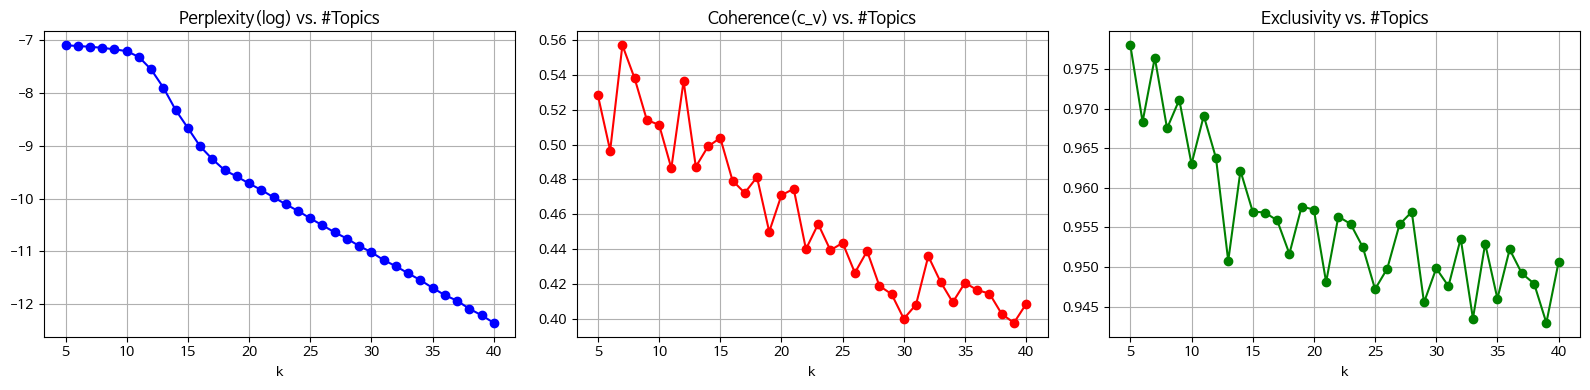


üîπ Coherence Í∏∞Ï§Ä ÏµúÍ≥† k = 7 (Coherence=0.5569)


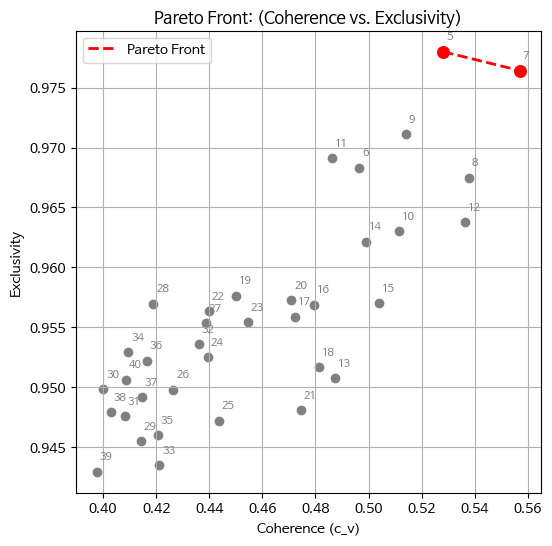


üî∏ Pareto front ÎÇ¥ k ÌõÑÎ≥¥:
  k=5, coherence=0.5281, exclusivity=0.9780
  k=7, coherence=0.5569, exclusivity=0.9764

‚úÖ Pareto set Ï§ë (Coherence+Exclusivity) Ìï©Ïù¥ ÏµúÎåÄÏù∏ k=7, score=1.5334
üìå ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú k = 7
‚úÖ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú kÍ∞Ä 'best_k.pkl'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [8]:
##############################################################################
# 10) LDA ÌèâÍ∞Ä: Coherence, Perplexity, Exclusivity & Pareto Front
##############################################################################
def compute_exclusivity(model, num_words=20):
    topic_words = []
    for tid in range(model.num_topics):
        tw = [word for word, _ in model.show_topic(tid, topn=num_words)]
        topic_words.append(tw)
    excl_scores = []
    for i, words_i in enumerate(topic_words):
        overlap_counts = []
        for w in words_i:
            overlap_count = sum(w in topic_words[j] for j in range(model.num_topics) if j != i)
            overlap_counts.append(overlap_count)
        avg_overlap = np.mean(overlap_counts)
        excl = 1 - (avg_overlap / num_words)
        excl_scores.append(excl)
    return np.mean(excl_scores)

def find_pareto_front(points):
    pareto = []
    for (xA, yA, kA) in points:
        dominated = False
        for (xB, yB, kB) in points:
            if (xB >= xA and yB >= yA) and ((xB > xA) or (yB > yA)):
                dominated = True
                break
        if not dominated:
            pareto.append((xA, yA, kA))
    return pareto

def show_coherence_exclusivity_with_pareto(df_texts, dictionary, corpus,
                                           k_min=3, k_max=10,
                                           passes=20, iterations=400, chunksize=1000,
                                           random_state=42):
    results = []  # (k, perplex, coherence, exclusivity)
    best_coh = float('-inf')
    best_k_coh = None
    for k in range(k_min, k_max+1):
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=k,
            passes=passes,
            iterations=iterations,
            chunksize=chunksize,
            eval_every=0,
            random_state=random_state
        )
        perp = lda_model.log_perplexity(corpus)
        cm_model = CoherenceModel(model=lda_model, texts=df_texts, dictionary=dictionary, coherence='c_v')
        coh = cm_model.get_coherence()
        excl = compute_exclusivity(lda_model)
        results.append((k, perp, coh, excl))
        print(f"[k={k}] Coherence={coh:.4f}, Perplex={perp:.4f}, Exclusivity={excl:.4f}")
        if coh > best_coh:
            best_coh = coh
            best_k_coh = k
    ks = [r[0] for r in results]
    perps = [r[1] for r in results]
    cohes = [r[2] for r in results]
    exclu = [r[3] for r in results]

    plt.figure(figsize=(16,4))
    plt.subplot(1, 3, 1)
    plt.plot(ks, perps, 'b-o')
    plt.title("Perplexity(log) vs. #Topics")
    plt.xlabel("k")
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(ks, cohes, 'r-o')
    plt.title("Coherence(c_v) vs. #Topics")
    plt.xlabel("k")
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(ks, exclu, 'g-o')
    plt.title("Exclusivity vs. #Topics")
    plt.xlabel("k")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nüîπ Coherence Í∏∞Ï§Ä ÏµúÍ≥† k = {best_k_coh} (Coherence={best_coh:.4f})")

    ce_points = [(r[2], r[3], r[0]) for r in results]
    pareto_set = find_pareto_front(ce_points)

    plt.figure(figsize=(6,6))
    for (c_val, e_val, k_val) in ce_points:
        plt.scatter(c_val, e_val, color='gray')
        plt.text(c_val+0.001, e_val+0.001, str(k_val), fontsize=8, color='gray')

    pareto_sorted = sorted(pareto_set, key=lambda x: x[0])
    px = [p[0] for p in pareto_sorted]
    py = [p[1] for p in pareto_sorted]
    plt.plot(px, py, 'r--', lw=2, label="Pareto Front")
    plt.scatter(px, py, color='red', s=70)

    plt.title("Pareto Front: (Coherence vs. Exclusivity)")
    plt.xlabel("Coherence (c_v)")
    plt.ylabel("Exclusivity")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nüî∏ Pareto front ÎÇ¥ k ÌõÑÎ≥¥:")
    for (c,e,kval) in pareto_set:
        print(f"  k={kval}, coherence={c:.4f}, exclusivity={e:.4f}")

    best_sum = -999
    best_k_sum = None
    for (c,e,kval) in pareto_set:
        score = c + e
        if score > best_sum:
            best_sum = score
            best_k_sum = kval
    print(f"\n‚úÖ Pareto set Ï§ë (Coherence+Exclusivity) Ìï©Ïù¥ ÏµúÎåÄÏù∏ k={best_k_sum}, score={best_sum:.4f}")
    return best_k_sum

best_k = show_coherence_exclusivity_with_pareto(
    df_texts=df["tokens"].tolist(),
    dictionary=dictionary,
    corpus=corpus,
    k_min=5,
    k_max=40,
    passes=10,
    iterations=300,
    chunksize=500,
    random_state=42
)
print("üìå ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú k =", best_k)
with open("best_k.pkl", "wb") as f:
    pickle.dump(best_k, f)
print("‚úÖ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú kÍ∞Ä 'best_k.pkl'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

In [9]:
##############################################################################
# 11) Ïó∞ÎèÑÎ≥Ñ LDA ÌÇ§ÏõåÎìú Ï∂îÏ∂ú & Word2Vec ÌïôÏäµ
##############################################################################
def get_yearly_lda_keywords(df, dictionary, k, passes=10, iterations=300, topn=10, random_state=42):
    yearly_keywords_map = {}
    unique_years = sorted(df["year"].unique())
    for y in unique_years:
        subset = df[df["year"] == y]
        if len(subset) < 3:
            print(f"‚ö† {y}ÎÖÑÎèÑ Î¨∏ÏÑúÍ∞Ä 3Í∞ú ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ïä§ÌÇµ")
            continue
        sub_dict = Dictionary(subset["tokens"])
        sub_dict.filter_extremes(no_below=2, no_above=0.7)
        sub_corpus = [sub_dict.doc2bow(t) for t in subset["tokens"]]
        lda_model = LdaModel(
            corpus=sub_corpus,
            id2word=sub_dict,
            num_topics=k,
            passes=passes,
            iterations=iterations,
            random_state=random_state
        )
        all_top_words = set()
        for topic_id in range(k):
            for w, _ in lda_model.show_topic(topic_id, topn=topn):
                all_top_words.add(w)
        yearly_keywords_map[y] = list(all_top_words)
    return yearly_keywords_map

yearly_keywords = get_yearly_lda_keywords(df, dictionary, k=best_k)
print(yearly_keywords)
with open("lda_keywords_by_year.pkl","wb") as f:
    pickle.dump(yearly_keywords, f)
print("\n‚úÖ Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìúÍ∞Ä 'lda_keywords_by_year.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


# Word2Vec Î™®Îç∏ ÌïôÏäµ (Ïó∞ÎèÑÎ≥Ñ)
yearly_docs = {}
for year in sorted(df["year"].unique()):
    docs = df[df["year"] == year]["tokens"].tolist()
    yearly_docs[year] = docs

word2vec_models = {}
for year, sentences in yearly_docs.items():
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    word2vec_models[year] = model

with open("word2vec_models.pkl", "wb") as f:
    pickle.dump(word2vec_models, f)
print("\n‚úÖ Ïó∞ÎèÑÎ≥Ñ Word2Vec ÌïôÏäµ ÏôÑÎ£å!")

‚ö† 1989ÎÖÑÎèÑ Î¨∏ÏÑúÍ∞Ä 3Í∞ú ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ïä§ÌÇµ
‚ö† 1994ÎÖÑÎèÑ Î¨∏ÏÑúÍ∞Ä 3Í∞ú ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ïä§ÌÇµ
{1985: ['ÌòÅÏã†', 'Íµ≠Ìöå', 'Ï∞ΩÏùòÏÑ±', 'ÏßÄÏ†Å', 'Í∏∞Ïà†', 'Ï†ïÏπò', 'ÏùòÏõê', 'Ï£ºÏû•', 'ÌïÑÏöîÌïòÎã§', 'ÏÇ¨Ìöå', 'Î≥ÄÌôî', 'ÌÖåÌÅ¨ÎÖ∏', 'ÏûêÏÇ∞', 'Ïó∞Íµ¨', 'ÌïÑÏöîÏÑ±', 'Ï§ëÏöîÌïòÎã§'], 1996: ['Ïó∞Î£å', 'Í≥ÑÌöç', 'Ï¶ùÍ∞Ä', 'ÎåÄÏ≤¥', 'ÌïÑÏöîÌïòÎã§', 'Í∞ÄÏä§', 'ÏÇ¨Ïö©'], 1997: ['Í∞úÎ∞ú', 'Í∏∞Ïà†', 'Ï¶ùÍ∞Ä', 'Ï∂îÏßÑ', 'Î∞úÏñ∏', 'ÏÑ§ÎπÑ', 'Í≥ÑÌöç'], 1998: ['Í≥µÎã®', 'Ï§ëÏÜåÍ∏∞ÏóÖ', 'ÏÇ¨ÏóÖ', 'ÏßëÏ§ë', 'Í¥ÄÎ¶¨', 'Ï∂îÏßÑ', 'ÎßàÎ†®', 'Ï¢ÖÌï©', 'Ïñ∏Í∏â', 'Í∞ÄÎä•ÏÑ±', 'Í∞ïÏ°∞', 'Í∏∞Ïà†', 'Ï≤¥Í≤∞', 'ÏÜåÎπÑ', 'ÏúÑÏõê', 'Ïó≠Ìï†', 'Í∏∞ÏóÖ', 'ÌïÑÏöîÏÑ±', 'ÍπÄÏπ†Ìôò', 'ÏßÄÏ†Å', 'Ï§ëÏöîÏÑ±', 'Î≥¥Í∏â', 'Ï≤≠Ï†ï', 'Ìö®Ïú®', 'ÎãµÎ≥Ä', 'Ï§ëÏù¥', 'Ìà¨Ïûê', 'ÏßÄÏõê'], 1999: ['Í≤ÄÌÜ†', 'Í¥ÄÎ†®', 'Í≥ºÍ∏∞Î∂Ä', 'Î¨∏Ï†ú', 'ÏöîÍµ¨', 'ÌïúÏ†Ñ', 'Î∞ÄÎ¥â', 'Î∞úÏ†ÑÏÜå', 'Ïù¥Ïú†', 'Ï°∞ÏÇ¨', 'ÏïïÎ†•', 'ÎàÑÏÑ§Îüâ', 'Í≥†Î†§', 'Ïù¥Î•¥Îã§', 'Ìè≠Î∞ú', 'Íµ≠ÎØº', 'Î∞úÏñ∏', 'ÌïÑÏöîÌïòÎã§', 'ÏïàÏ†Ñ', 'ÏßàÏùò', 'Ïö¥ÏòÅ', '

In [10]:
##############################################################################
# 12) Word2Vec Í∏∞Î∞ò Ïó∞ÎèÑ Î≥ëÌï© Î°úÏßÅ (LDA ÌÇ§ÏõåÎìú ÌôúÏö©)
##############################################################################
with open("lda_keywords_by_year.pkl", "rb") as f:
    lda_keywords_by_year = pickle.load(f)

def get_word_similarity(word, year1, year2):
    if (word in word2vec_models[year1].wv) and (word in word2vec_models[year2].wv):
        vec1 = word2vec_models[year1].wv[word]
        vec2 = word2vec_models[year2].wv[word]
        return 1 - cosine(vec1, vec2)
    return None

min_docs = 3
topic_change_threshold = 0.7
time_slice_dynamic = []
merged_years = []
unique_years = sorted(df["year"].unique())
current_year = None
current_count = 0

for i in range(len(unique_years) - 1):
    y1 = unique_years[i]
    y2 = unique_years[i + 1]
    lda_keywords = list(set(lda_keywords_by_year.get(y1, [])) & set(lda_keywords_by_year.get(y2, [])))
    if not lda_keywords:
        lda_keywords = ["Î∞úÏ†Ñ", "Í∏∞ÏóÖ", "ÏÉùÏÇ∞", "ÏßÄÏõê", "Ï†ÑÏßÄ", "ÏûêÎèôÏ∞®", "Ï†ÑÍ∏∞Ï∞®", "ÏãúÏû•", "Í≤ΩÏ†ú", "Í≥µÏû•", "ÌÉÑÏÜå"]
    word_change = np.mean([get_word_similarity(w, y1, y2) or 0 for w in lda_keywords])
    if current_year is None:
        current_year = y1
        current_count = len(df[df["year"]==y1])
    if word_change > topic_change_threshold or current_count < min_docs:
        current_count += len(df[df["year"]==y2])
    else:
        time_slice_dynamic.append(current_count)
        merged_years.append(f"{current_year}-{y1}" if current_year != y1 else str(current_year))
        current_year = y2
        current_count = len(df[df["year"]==y2])
time_slice_dynamic.append(current_count)
merged_years.append(str(current_year))

with open("time_slice_dynamic.pkl", "wb") as f:
    pickle.dump(time_slice_dynamic, f)
with open("merged_years.pkl", "wb") as f:
    pickle.dump(merged_years, f)

print("\n‚úÖ Ïó∞ÎèÑ Î≥ëÌï©(ÎèôÏ†Å Íµ¨Í∞Ñ) ÏôÑÎ£å!")
print("time_slice_dynamic:", time_slice_dynamic)
print("merged_years:", merged_years)


‚úÖ Ïó∞ÎèÑ Î≥ëÌï©(ÎèôÏ†Å Íµ¨Í∞Ñ) ÏôÑÎ£å!
time_slice_dynamic: [3, 6, 3, 5, 68, 16, 50, 21, 52, 588, 167, 122, 115, 58, 51, 26, 139, 130, 103, 334, 193, 5024, 71]
merged_years: ['1985', '1989-1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004-2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018-2023', '2024']


All years: [1985, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

[Ïó∞ÎèÑÎ≥Ñ ÌÜ†ÌîΩ Î≥ÄÌôî ÏòàÏãú]--------------------------------
1985 ‚Üí 1996 CosSim=0.0976
1996 ‚Üí 1997 CosSim=0.2857
1997 ‚Üí 1998 CosSim=0.1429
1998 ‚Üí 1999 CosSim=0.1620
1999 ‚Üí 2000 CosSim=0.1938
2000 ‚Üí 2001 CosSim=0.2890
2001 ‚Üí 2002 CosSim=0.2391
2002 ‚Üí 2003 CosSim=0.2638
2003 ‚Üí 2004 CosSim=0.4090
2004 ‚Üí 2005 CosSim=0.5767
2005 ‚Üí 2006 CosSim=0.3812
2006 ‚Üí 2007 CosSim=0.4749
2007 ‚Üí 2008 CosSim=0.4682
2008 ‚Üí 2009 CosSim=0.5959
2009 ‚Üí 2010 CosSim=0.3791
2010 ‚Üí 2011 CosSim=0.3292
2011 ‚Üí 2012 CosSim=0.2909
2012 ‚Üí 2013 CosSim=0.2478
2013 ‚Üí 2014 CosSim=0.3883
2014 ‚Üí 2015 CosSim=0.4188
2015 ‚Üí 2016 CosSim=0.4635
2016 ‚Üí 2017 CosSim=0.5262
2017 ‚Üí 2018 CosSim=0.4605
2018 ‚Üí 2019 CosSim=0.6025
2019 ‚Üí 2020 CosSim=0.5367
2020 ‚Üí 2021 CosSim=0.5787
2021 ‚Üí 2022 

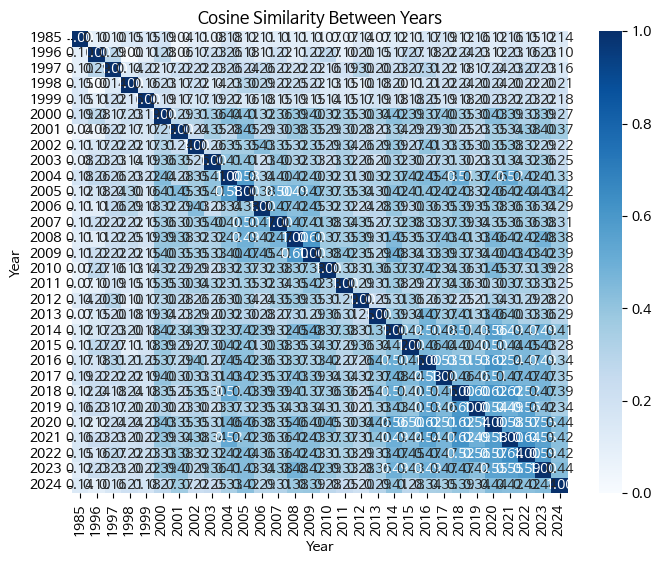

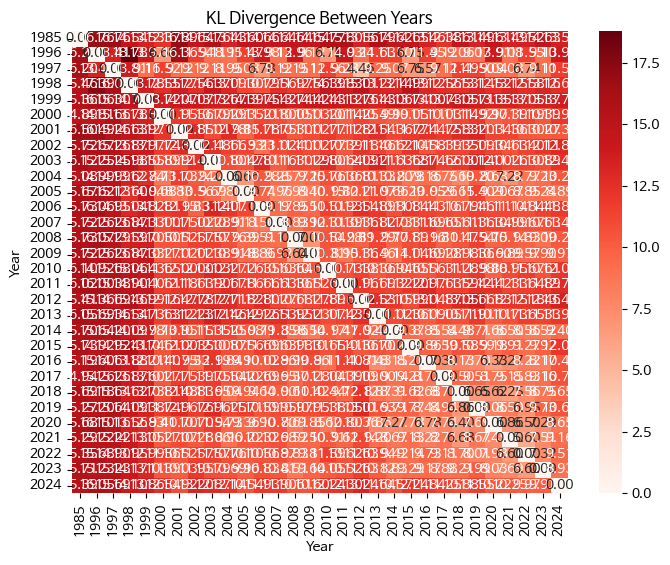

‚ö† Colab ÌôòÍ≤ΩÏù¥ ÏïÑÎãôÎãàÎã§. ÌååÏùºÏùÄ Î°úÏª¨Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [11]:
##############################################################################
# 13) Ïó∞ÎèÑÎ≥Ñ ÌÜ†ÌîΩ Î≥ÄÌôî Î∂ÑÏÑù (Cosine Similarity & KL Divergence)
##############################################################################
all_years = sorted(list(yearly_keywords.keys()))
print("All years:", all_years)
year_topic_vectors = {}
for y in all_years:
    word_list = yearly_keywords[y]
    vec = np.zeros(len(dictionary))
    for w in word_list:
        if w in dictionary.token2id:
            vec[dictionary.token2id[w]] += 1
    if np.sum(vec) > 0:
        vec = vec / np.sum(vec)
    year_topic_vectors[y] = vec

if len(all_years) == 0:
    print("‚ö† 'yearly_keywords'Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ Ï°∞Í±¥ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    year_similarities = []
    year_kl_divergences = []
    for i in range(len(all_years)-1):
        y1, y2 = all_years[i], all_years[i+1]
        v1, v2 = year_topic_vectors[y1], year_topic_vectors[y2]
        cos_sim = cossim(dict(enumerate(v1)), dict(enumerate(v2)))
        kl_div = entropy(v1 + 1e-9, v2 + 1e-9)
        year_similarities.append((y1, y2, cos_sim))
        year_kl_divergences.append((y1, y2, kl_div))

    df_similarity = pd.DataFrame(year_similarities, columns=["Year1", "Year2", "Cosine_Sim"])
    df_kl = pd.DataFrame(year_kl_divergences, columns=["Year1", "Year2", "KL_Div"])

    df_similarity.to_excel("Year_Topic_CosSim.xlsx", index=False)
    df_kl.to_excel("Year_Topic_KLDiv.xlsx", index=False)

    print("\n[Ïó∞ÎèÑÎ≥Ñ ÌÜ†ÌîΩ Î≥ÄÌôî ÏòàÏãú]--------------------------------")
    for (y1, y2, s) in year_similarities:
        print(f"{y1} ‚Üí {y2} CosSim={s:.4f}")
    for (y1, y2, kl) in year_kl_divergences:
        print(f"{y1} ‚Üí {y2} KLDiv={kl:.4f}")

    cos_matrix = pd.DataFrame(np.zeros((len(all_years), len(all_years))),
                              index=all_years, columns=all_years)
    for i, y1 in enumerate(all_years):
        v1 = year_topic_vectors[y1]
        for j, y2 in enumerate(all_years):
            v2 = year_topic_vectors[y2]
            if np.sum(v1) == 0 or np.sum(v2) == 0:
                cos_val = 0.0
            else:
                cos_val = cossim(dict(enumerate(v1)), dict(enumerate(v2)))
            cos_matrix.loc[y1, y2] = cos_val
    plt.figure(figsize=(8,6))
    sns.heatmap(cos_matrix, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Cosine Similarity Between Years")
    plt.xlabel("Year")
    plt.ylabel("Year")
    plt.show()

    kl_matrix = pd.DataFrame(np.zeros((len(all_years), len(all_years))),
                             index=all_years, columns=all_years)
    for i, y1 in enumerate(all_years):
        v1 = year_topic_vectors[y1]
        for j, y2 in enumerate(all_years):
            v2 = year_topic_vectors[y2]
            kl_val = entropy(v1 + 1e-9, v2 + 1e-9)
            kl_matrix.loc[y1, y2] = kl_val
    plt.figure(figsize=(8,6))
    sns.heatmap(kl_matrix, annot=True, cmap="Reds", fmt=".2f")
    plt.title("KL Divergence Between Years")
    plt.xlabel("Year")
    plt.ylabel("Year")
    plt.show()

try:
    from google.colab import files
    files.download("Year_Topic_CosSim.xlsx")
    files.download("Year_Topic_KLDiv.xlsx")
    print("‚úÖ ÌååÏùºÏù¥ Îã§Ïö¥Î°úÎìúÎêòÏóàÏäµÎãàÎã§.")
except ImportError:
    print("‚ö† Colab ÌôòÍ≤ΩÏù¥ ÏïÑÎãôÎãàÎã§. ÌååÏùºÏùÄ Î°úÏª¨Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


In [12]:
# ---------------------------------------------------------------------------
# (0) Í≥µÌÜµ import
# ---------------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle
from gensim.models.ldaseqmodel import LdaSeqModel
import matplotlib.pyplot as plt   # ÌïÑÏöî Ïãú ÏÇ¨Ïö©

# ---------------------------------------------------------------------------
# (1) ÌïÑÏöîÌïú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
# ---------------------------------------------------------------------------
df = pd.read_pickle("df_documents_tokens.pkl")          # Ï†ÑÏ≤òÎ¶¨Îêú df
with open("time_slice_dynamic.pkl", "rb") as f:
    time_slice_dynamic = pickle.load(f)
with open("merged_years.pkl", "rb") as f:
    merged_years = pickle.load(f)
with open("corpus.pkl", "rb") as f:
    corpus = pickle.load(f)
with open("dictionary.pkl", "rb") as f:
    dictionary = pickle.load(f)
with open("best_k.pkl", "rb") as f:
    best_k = pickle.load(f)

print("üìÇ ÌååÏùº Î°úÎìú ÏôÑÎ£å")

# ---------------------------------------------------------------------------
# (2) DTM(LdaSeqModel) ÌïôÏäµ
# ---------------------------------------------------------------------------
ldaseq = LdaSeqModel(
    corpus=corpus,
    id2word=dictionary,
    time_slice=time_slice_dynamic,
    num_topics=best_k,
    random_state=42
)

print("\n‚úÖ LdaSeqModel ÌïôÏäµ ÏôÑÎ£å")
print("  ‚Ä¢ time_slice_dynamic =", time_slice_dynamic, "(Ìï© =", sum(time_slice_dynamic), ")")
print("  ‚Ä¢ merged_years       =", merged_years)
print("  ‚Ä¢ best_k             =", best_k)

ldaseq.save("my_dtmmodel")
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ‚Üí 'my_dtmmodel'")

üìÇ ÌååÏùº Î°úÎìú ÏôÑÎ£å


c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)
c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encount


‚úÖ LdaSeqModel ÌïôÏäµ ÏôÑÎ£å
  ‚Ä¢ time_slice_dynamic = [3, 6, 3, 5, 68, 16, 50, 21, 52, 588, 167, 122, 115, 58, 51, 26, 139, 130, 103, 334, 193, 5024, 71] (Ìï© = 7345 )
  ‚Ä¢ merged_years       = ['1985', '1989-1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004-2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018-2023', '2024']
  ‚Ä¢ best_k             = 7
‚úÖ Î™®Îç∏ Ï†ÄÏû• ‚Üí 'my_dtmmodel'


In [13]:
# ---------------------------------------------------------------------------
# (3) (1) ÏãúÏ†êÎ≥Ñ ÌÜ†ÌîΩ ÎåÄÌëúÎã®Ïñ¥ Ï∂îÏ∂ú ‚Üí DTM_Topic_Words.xlsx
# ---------------------------------------------------------------------------
topic_word_detail = []

for topic_id in range(best_k):
    # topic_times: Í∞Å ÏãúÏ†êÎ≥Ñ (Îã®Ïñ¥, Í∞ÄÏ§ëÏπò) Î¶¨Ïä§Ìä∏
    topic_times = ldaseq.print_topic_times(topic_id)
    for t_idx, word_weight_list in enumerate(topic_times):
        the_year = merged_years[t_idx] if t_idx < len(merged_years) else f"TimeIndex_{t_idx}"

        # ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Ï†ÄÏû•
        for (word, weight) in word_weight_list[:20]:
            topic_word_detail.append({
                "Topic": topic_id,
                "TimeIndex": t_idx,
                "Year": the_year,
                "Word": word,
                "Weight": weight
            })

df_topic_words = pd.DataFrame(topic_word_detail)
df_topic_words.to_excel("DTM_Topic_Words.xlsx", index=False)
print("‚úÖ (1) ÏãúÏ†êÎ≥Ñ ÌÜ†ÌîΩ Îã®Ïñ¥/Í∞ÄÏ§ëÏπò ‚Üí 'DTM_Topic_Words.xlsx' Ï†ÄÏû• ÏôÑÎ£å")

‚úÖ (1) ÏãúÏ†êÎ≥Ñ ÌÜ†ÌîΩ Îã®Ïñ¥/Í∞ÄÏ§ëÏπò ‚Üí 'DTM_Topic_Words.xlsx' Ï†ÄÏû• ÏôÑÎ£å


In [14]:
# ---------------------------------------------------------------------------
# (4) (2) Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩ Î∂ÑÌè¨ Ï∂îÏ∂ú ‚Üí DTM_Doc_Topic_Distribution.xlsx
#      Gensim 4.xÏóêÏÑúÎäî ldaseq.doc_topics(doc_number) Îßå ÏßÄÏõêÌïòÎØÄÎ°ú
#      time Ïù∏ÏàòÎ•º ÎÑòÍ∏∞ÏßÄ ÏïäÎäîÎã§.
# ---------------------------------------------------------------------------

n_docs = len(df)

# Í∞Å Î¨∏ÏÑúÏùò ÌÜ†ÌîΩ ÌôïÎ•† Î≤°ÌÑ∞Î•º Ìïú Î≤àÏóê ÏåìÎäîÎã§
doc_topic_matrix = np.vstack([ldaseq.doc_topics(i)  # i = Î¨∏ÏÑú Î≤àÌò∏ (0-based)
                              for i in range(n_docs)])  # shape = (n_docs, best_k)

print("doc_topic_matrix.shape =", doc_topic_matrix.shape)

# dfÏóê ÌÜ†ÌîΩ ÌôïÎ•† Ïó¥ Ï∂îÍ∞Ä
for topic_id in range(best_k):
    df[f"DTM_Topic{topic_id}"] = doc_topic_matrix[:, topic_id]

# Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÜ†ÌîΩÏùÑ Dominant TopicÏúºÎ°ú ÏÑ§Ï†ï
df["DTM_DominantTopic"] = np.argmax(doc_topic_matrix, axis=1)

df.to_excel("DTM_Doc_Topic_Distribution.xlsx", index=False)
print("‚úÖ (2) Î¨∏ÏÑúÎ≥Ñ DTM ÌÜ†ÌîΩ ÌôïÎ•† ‚Üí 'DTM_Doc_Topic_Distribution.xlsx' Ï†ÄÏû• ÏôÑÎ£å")

doc_topic_matrix.shape = (7345, 7)
‚úÖ (2) Î¨∏ÏÑúÎ≥Ñ DTM ÌÜ†ÌîΩ ÌôïÎ•† ‚Üí 'DTM_Doc_Topic_Distribution.xlsx' Ï†ÄÏû• ÏôÑÎ£å


In [15]:
# ---------------------------------------------------------------------------
# (4) (2) Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩ Î∂ÑÌè¨ Ï∂îÏ∂ú ‚Üí DTM_Doc_Topic_Distribution.xlsx
#      Gensim 4.xÏóêÏÑúÎäî ldaseq.doc_topics(doc_number) Îßå ÏßÄÏõê.
# ---------------------------------------------------------------------------

import pandas as pd
import pickle, numpy as np
from gensim.models.ldaseqmodel import LdaSeqModel

# ‚îÄ‚îÄ ‚ë† Ï†ÑÏ≤òÎ¶¨Îêú Î¨∏ÏÑú DataFrame Î∂àÎü¨Ïò§Í∏∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
#   (ÎãπÏã†Ïù¥ Ï†ÄÏû•Ìï¥Îëî ÌååÏùº ÌòïÏãùÏóê ÎßûÏ∂∞ Í≤ΩÎ°úÎßå Î∞îÍøî Ï£ºÏÑ∏Ïöî)
df = pd.read_pickle(r"C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front - 5-40\df_documents_tokens.pkl")        # ‚Üê Ïòà: pickle
#   ÎòêÎäî
# df = pd.read_excel("preprocessed_documents.xlsx")   # ‚Üê Ïòà: ÏóëÏÖÄ

# ‚îÄ‚îÄ ‚ë° ÌïôÏäµÌï¥ Îëî DTM Î™®Îç∏Í≥º Î≥ÄÏàòÎì§ Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ldaseq = LdaSeqModel.load("my_dtmmodel")               # ÌïôÏäµÎêú Î™®Îç∏
with open("best_k.pkl", "rb") as f:
    best_k = pickle.load(f)                            # ÌÜ†ÌîΩ Í∞úÏàò


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ raw df ¬∑ Î™®Îç∏ ¬∑ Î≥ÄÏàò(best_k) Ï§ÄÎπÑÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï ‚îÄ‚îÄ
n_docs = len(df)

# 1) Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩÌôïÎ•† ÌñâÎ†¨
doc_topic_matrix = np.vstack([ldaseq.doc_topics(i)   # i = 0 ‚Ä¶ n_docs-1
                              for i in range(n_docs)])

print("doc_topic_matrix.shape =", doc_topic_matrix.shape)   # (n_docs, best_k)

# 2) ÌôïÎ•† Ïó¥ Î∂ôÏù¥Í∏∞
for k in range(best_k):
    df[f'DTM_Topic{k}'] = doc_topic_matrix[:, k]

df['DTM_DominantTopic'] = doc_topic_matrix.argmax(axis=1)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üîç  Ï∂îÍ∞Ä Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

topic_cols = [f'DTM_Topic{k}' for k in range(best_k)]

# (A) year Ïª¨Îüº Ï†ïÏàòÌòï Í∞ïÏ†ú
if not pd.api.types.is_integer_dtype(df['year']):
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
    print("‚úîÔ∏è  'year' Ïó¥ÏùÑ Ï†ïÏàòÌòï(Int64)ÏúºÎ°ú Î≥ÄÌôò")

# (B) Í∞Å Î¨∏ÏÑú ÌÜ†ÌîΩ Ìï©‚âà1 ÌôïÏù∏
sums = df[topic_cols].sum(axis=1)
off = np.abs(sums - 1)
n_off = (off > 0.01).sum()          # 1% Ïù¥ÏÉÅ Ïò§Ï∞®Í∞Ä ÏûàÎäî Ìñâ Ïàò
max_off = off.max() if n_off else 0
print(f"‚úîÔ∏è  ÌÜ†ÌîΩ ÌôïÎ•† Ìï© Ï†êÍ≤Ä:   {n_off} / {n_docs} Î¨∏ÏÑúÍ∞Ä 1ÏóêÏÑú ¬±0.01 Ïù¥ÏÉÅ Î≤óÏñ¥ÎÇ® "
      f"(ÏµúÎåÄ Ïò§Ï∞® {max_off:.4f})")

# (C) Í≤∞Ï∏°Ïπò ÌôïÏù∏
nan_cnt = df[topic_cols].isna().sum().sum()
if nan_cnt:
    print(f"‚ö†Ô∏è  Í≤ΩÍ≥†: ÌÜ†ÌîΩ ÌôïÎ•†Ïóê NaN {nan_cnt}Í∞ú Î∞úÍ≤¨ ‚Üí 0ÏúºÎ°ú ÎåÄÏ≤¥")
    df[topic_cols] = df[topic_cols].fillna(0)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÄÏû• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
out_path = "DTM_Doc_Topic_Distribution2.xlsx"
df.to_excel(out_path, index=False)
print(f"‚úÖ Î¨∏ÏÑúÎ≥Ñ DTM ÌÜ†ÌîΩ ÌôïÎ•† ‚Üí '{out_path}' Ï†ÄÏû• ÏôÑÎ£å")


doc_topic_matrix.shape = (7345, 7)
‚úîÔ∏è  ÌÜ†ÌîΩ ÌôïÎ•† Ìï© Ï†êÍ≤Ä:   0 / 7345 Î¨∏ÏÑúÍ∞Ä 1ÏóêÏÑú ¬±0.01 Ïù¥ÏÉÅ Î≤óÏñ¥ÎÇ® (ÏµúÎåÄ Ïò§Ï∞® 0.0000)
‚úÖ Î¨∏ÏÑúÎ≥Ñ DTM ÌÜ†ÌîΩ ÌôïÎ•† ‚Üí 'DTM_Doc_Topic_Distribution2.xlsx' Ï†ÄÏû• ÏôÑÎ£å


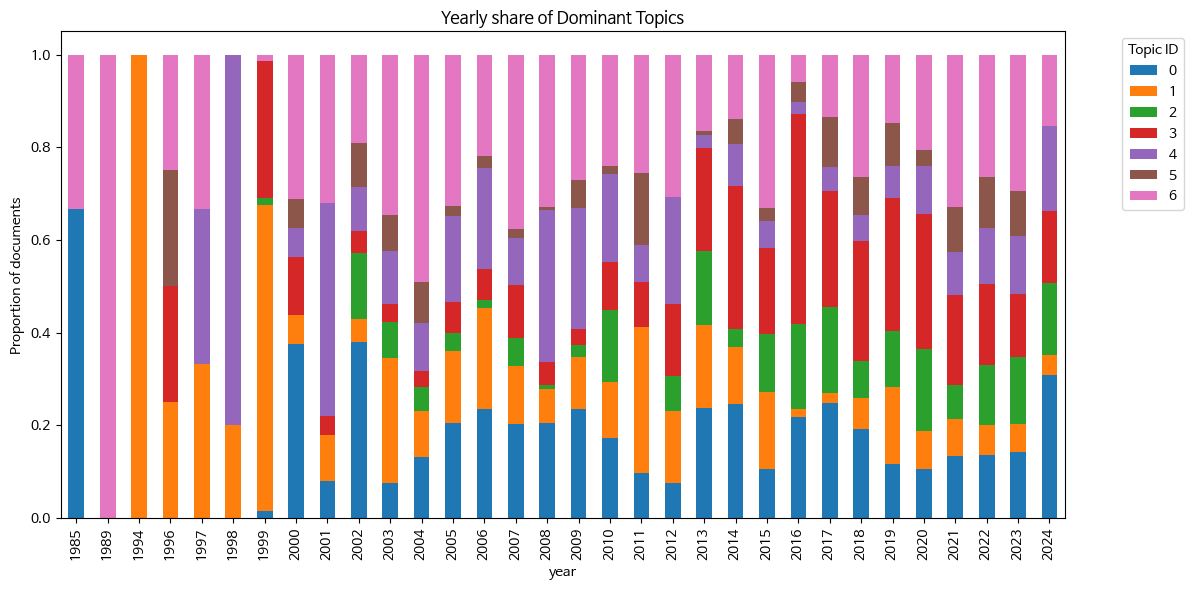

In [16]:
# 1) Ïó∞-ÌÜ†ÌîΩ ÍµêÏ∞®Ìëú: Ìñâ=year, Ïó¥=DominantTopic, Í∞í=Í±¥Ïàò
crosstab = (df
            .groupby(['year', 'DTM_DominantTopic'])
            .size()                         # Í±¥Ïàò
            .unstack(fill_value=0)          # Ïó¥ = ÌÜ†ÌîΩ ID
           )

# 2) ÎπÑÏú®Î°ú Î≥ÄÌôò
ratio = crosstab.div(crosstab.sum(axis=1), axis=0)

# 3) Ïä§ÌÉù ÎßâÎåÄ
ratio.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Proportion of documents')
plt.title('Yearly share of Dominant Topics')
plt.legend(title='Topic ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


‚úÖ ÌÜ†ÌîΩÎ≥Ñ Í∞ÄÏ§ëÏπò Î≥ÄÌôîÍ∞Ä 'Topic_Strength_Over_Time.xlsx'Ïóê Ï†ÄÏû•Îê®


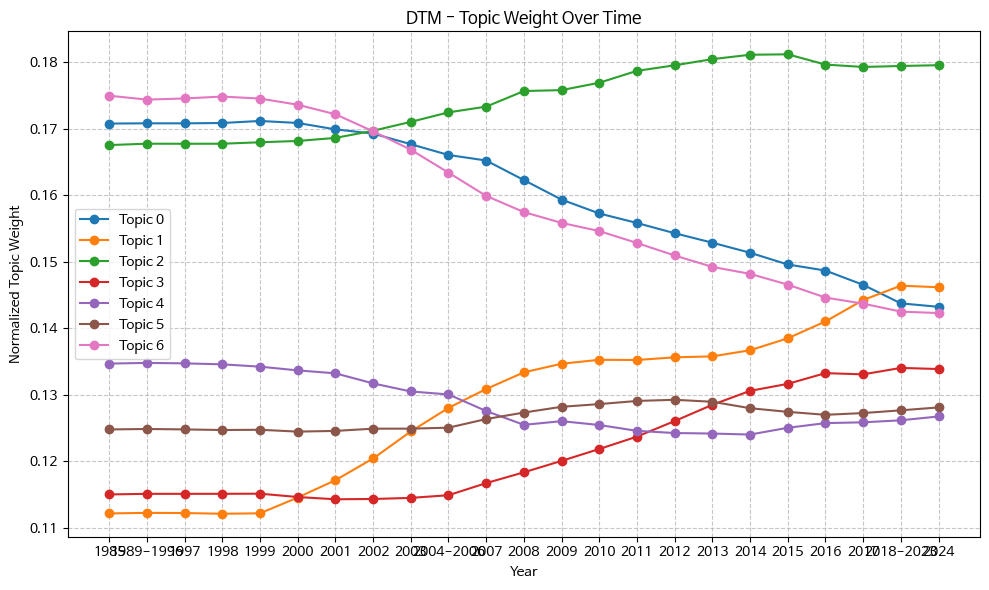

In [17]:
##############################################################################
# 16) ÏãúÏ†êÎ≥Ñ ÌÜ†ÌîΩ Í∞ïÎèÑ (Í∞ÄÏ§ëÏπò Ìï©) Î∞è ÏãúÍ∞ÅÌôî
##############################################################################
df_topic_words["abs_weight"] = df_topic_words["Weight"].abs()
df_topic_strength = (
    df_topic_words
    .groupby(["Topic","Year"], as_index=False)["abs_weight"]
    .sum()
    .rename(columns={"abs_weight":"Topic_Weight_Sum"})
)
df_topic_strength["Topic_Weight_Norm"] = df_topic_strength.groupby("Year")["Topic_Weight_Sum"].transform(
    lambda x: x / x.sum()
)
df_topic_strength.to_excel("Topic_Strength_Over_Time.xlsx", index=False)
print("\n‚úÖ ÌÜ†ÌîΩÎ≥Ñ Í∞ÄÏ§ëÏπò Î≥ÄÌôîÍ∞Ä 'Topic_Strength_Over_Time.xlsx'Ïóê Ï†ÄÏû•Îê®")

plt.figure(figsize=(10,6))
for t_id in sorted(df_topic_strength["Topic"].unique()):
    subset = df_topic_strength[df_topic_strength["Topic"] == t_id].copy()
    subset.sort_values("Year", inplace=True)
    label_name = f"Topic {t_id}"
    plt.plot(subset["Year"], subset["Topic_Weight_Norm"], marker='o', label=label_name)
plt.title("DTM - Topic Weight Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Topic Weight")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Topic_Weight_Trend.png", dpi=300)
plt.show()

In [19]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 17-A) ÏõêÎ≥∏ Î©îÌÉÄ(ÏÉòÌîåÎç∞Ïù¥ÌÑ∞_ver2..xlsx)ÏôÄ ÌÜ†ÌîΩ ÌôïÎ•† Í≤∞Ìï© ÌõÑ Ï†ÄÏû•
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
from pathlib import Path

# 1) Í≤ΩÎ°ú ÏßÄÏ†ï
META_PATH  = Path(r"C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front - 5-40\api_combined_parliament.xlsx")
TOPIC_OUT  = Path(r"C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front - 5-40\LDA_Document_Topic_Distribution_full.xlsx")

# 2) ÏõêÎ≥∏ Î©îÌÉÄ ÌååÏùº ÏùΩÍ∏∞
df_meta = pd.read_excel(META_PATH)

# 3) doc_topic_matrix_method1 (DataFrame)ÏóêÎäî Ïù¥ÎØ∏ ÌÜ†ÌîΩ ÌôïÎ•†Ïù¥ Îì§Ïñ¥ ÏûàÏùå
#    ¬∑ ID Ïó¥Ïù¥ Î©îÌÉÄÏóêÎèÑ ÏûàÎã§Î©¥ ÌÇ§Î°ú Î≥ëÌï©
#    ¬∑ IDÍ∞Ä ÏóÜÎã§Î©¥ "Ìñâ ÏàúÏÑúÍ∞Ä ÎèôÏùº"ÌïòÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê Í∑∏ÎÉ• Î∂ôÏù¥Í∏∞

KEY_COL = 'ID'                 # Ïã§Ï†ú Í≥†Ïú† ÏãùÎ≥ÑÏûê Ïó¥ Ïù¥Î¶ÑÏúºÎ°ú ÏàòÏ†ï!
if KEY_COL in df_meta.columns:
    # 3-a) ÏïàÏ†Ñ: ID Í∏∞Ï§Ä one-to-one Î≥ëÌï©
    df_topic = doc_topic_matrix_method1.copy()
    df_topic[KEY_COL] = df_meta[KEY_COL]          # ÎèôÏùº ÏàúÏÑúÎùºÎ©¥ Ïù¥Î†áÍ≤å ID Î∂ÄÏó¨
    df_full  = (df_meta
                .merge(df_topic, on=KEY_COL, how='left', validate='one_to_one'))
else:
    # 3-b) ÏàúÏÑú ÎèôÏùºÌï† Îïå: Ïó¥ Î∞©Ìñ•ÏúºÎ°ú concat
    df_full = pd.concat([df_meta.reset_index(drop=True),
                         doc_topic_matrix_method1.reset_index(drop=True)],
                        axis=1)

# 4) Ï†ÄÏû•
df_full.to_excel(TOPIC_OUT, index=False)
print(f"‚úÖ Î©îÌÉÄ + ÌÜ†ÌîΩ ÌôïÎ•† ÌÜµÌï© ÌååÏùº Ï†ÄÏû• ‚Üí {TOPIC_OUT}")


‚úÖ Î©îÌÉÄ + ÌÜ†ÌîΩ ÌôïÎ•† ÌÜµÌï© ÌååÏùº Ï†ÄÏû• ‚Üí C:\Users\Administrator\Desktop\Again_DTM_Parliamentary_with pareto front - 5-40\LDA_Document_Topic_Distribution_full.xlsx
